In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sm, md, lg = 13, 15, 20 
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [3]:
boys = pd.read_csv('https://raw.githubusercontent.com/KolatimiDave/13-school-progress/master/data/schools-with-boys-toilet-2013-2016.csv')
girls = pd.read_csv('https://raw.githubusercontent.com/KolatimiDave/13-school-progress/master/data/schools-with-girls-toilet-2013-2016.csv')

In [4]:
len(boys.State_UT.unique()) , len(girls.State_UT.unique())

(37, 37)

In [5]:
# Have a look of the Dataset
boys.head(2)


,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.0,100.0,100.0,100.0,0.0,0.0,100.0,0.0,100.00


In [6]:
boys_melted = pd.melt(boys, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melted = pd.melt(girls, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

In [7]:
boys_melted.head(3)

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
1,Andaman & Nicobar Islands,2014-15,Primary_Only,100.00
2,Andaman & Nicobar Islands,2015-16,Primary_Only,100.00


In [8]:
categ = boys.columns.to_list()[2:] # All student category type in a list

## Toilet Facilities for Boys in all Student Category

### Boys

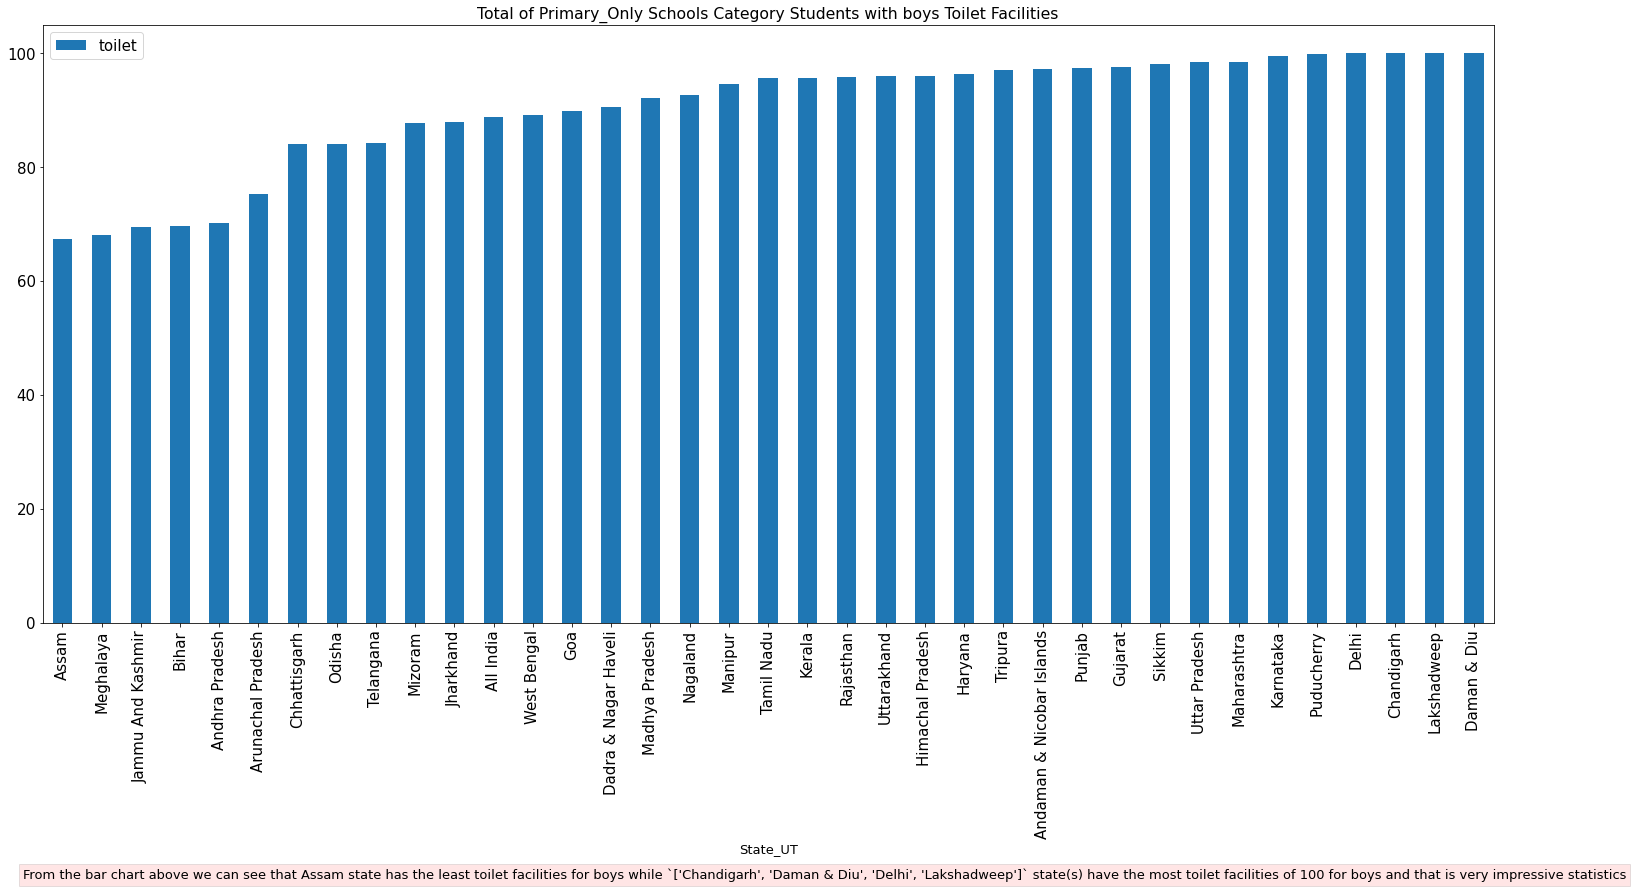

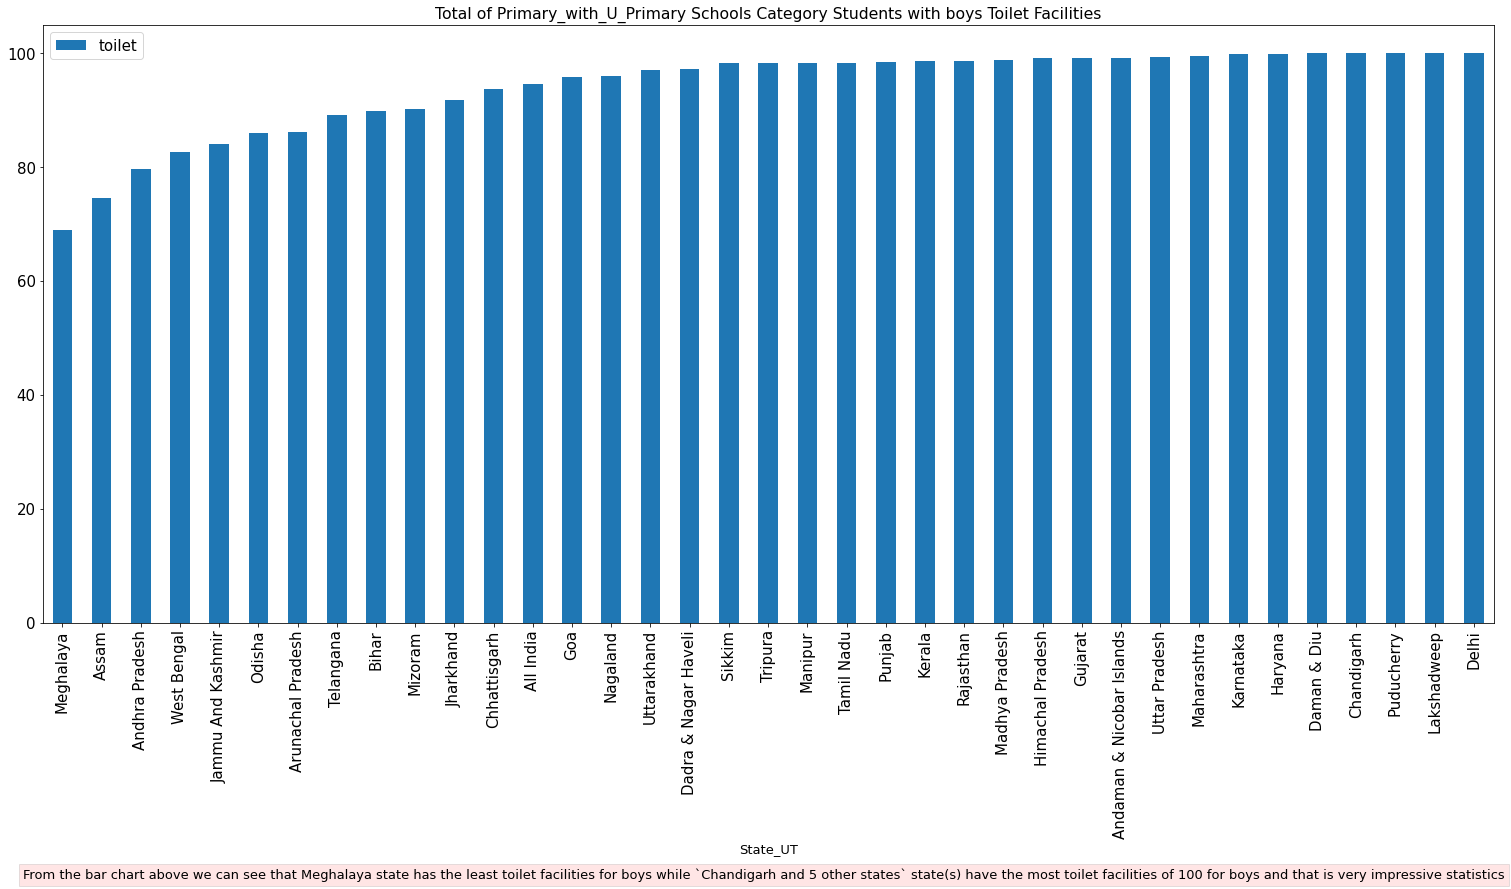

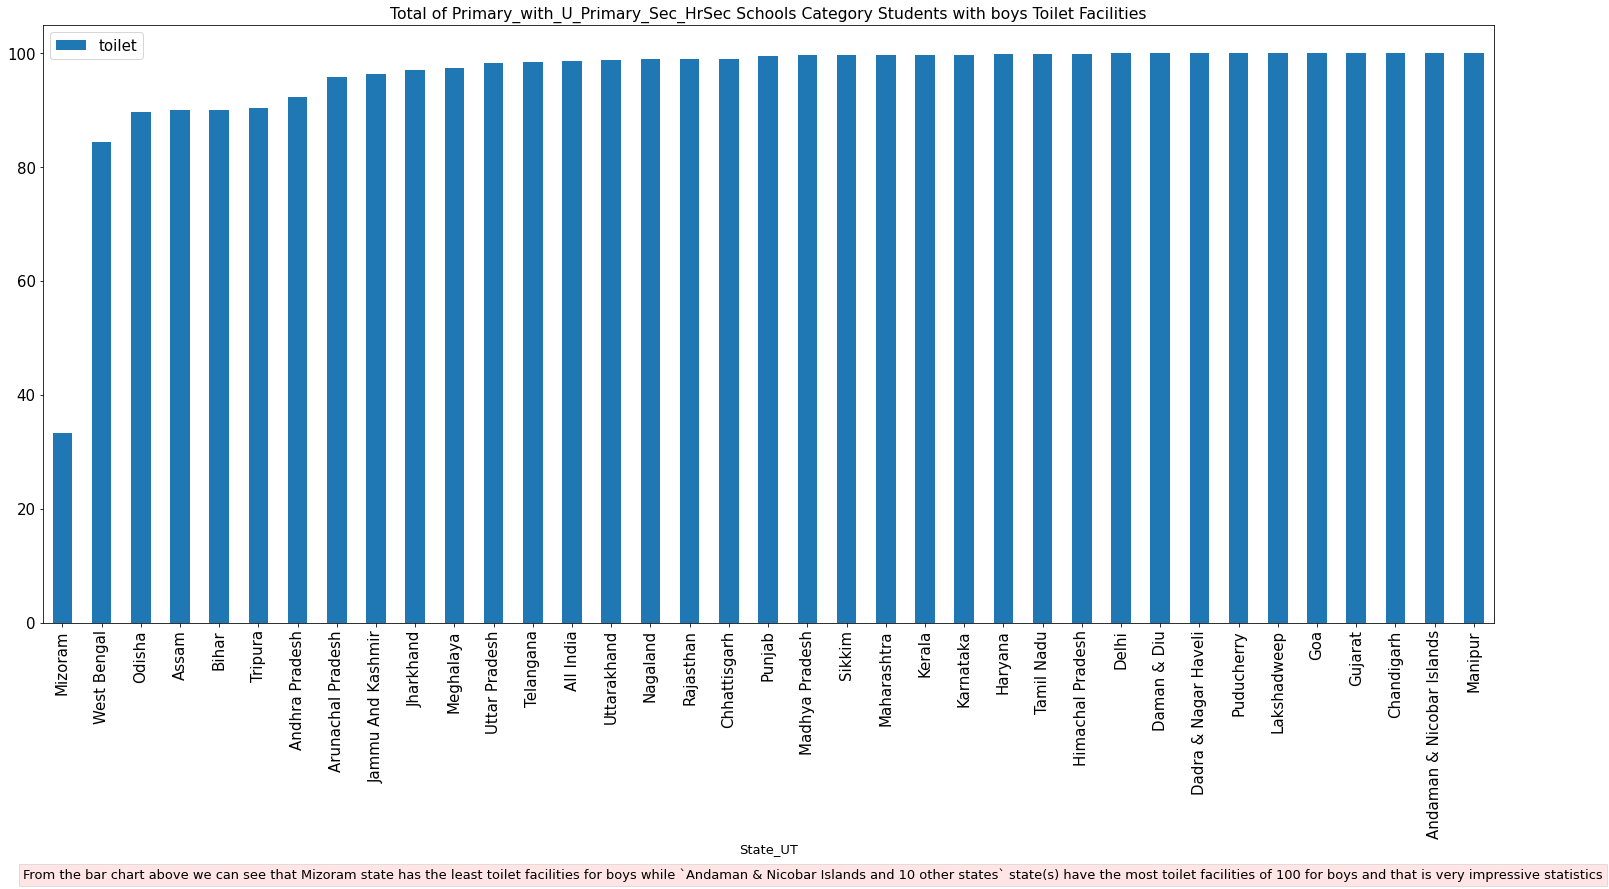

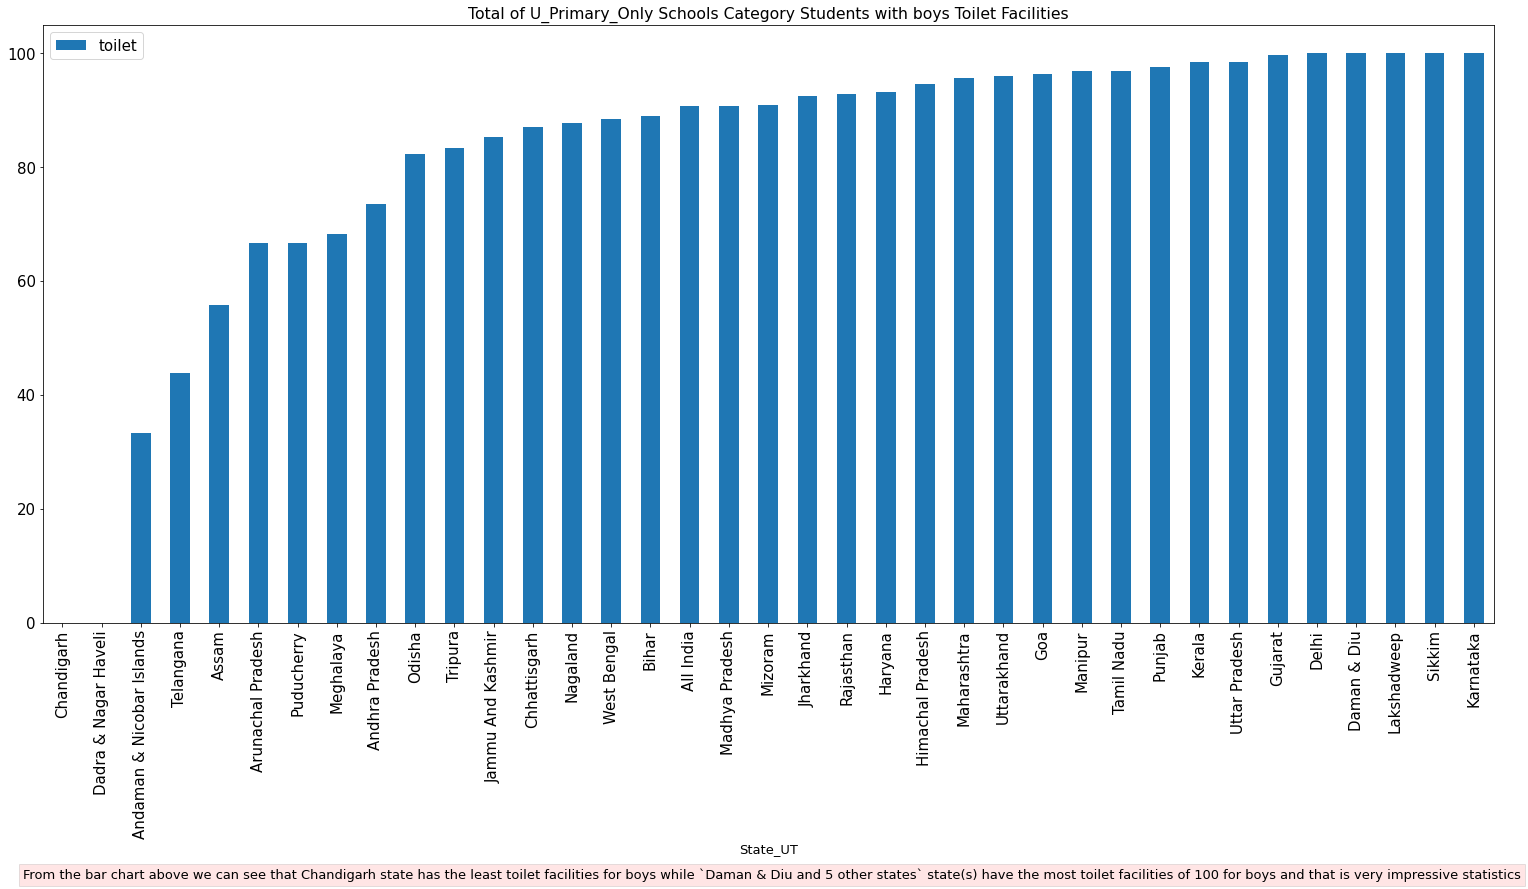

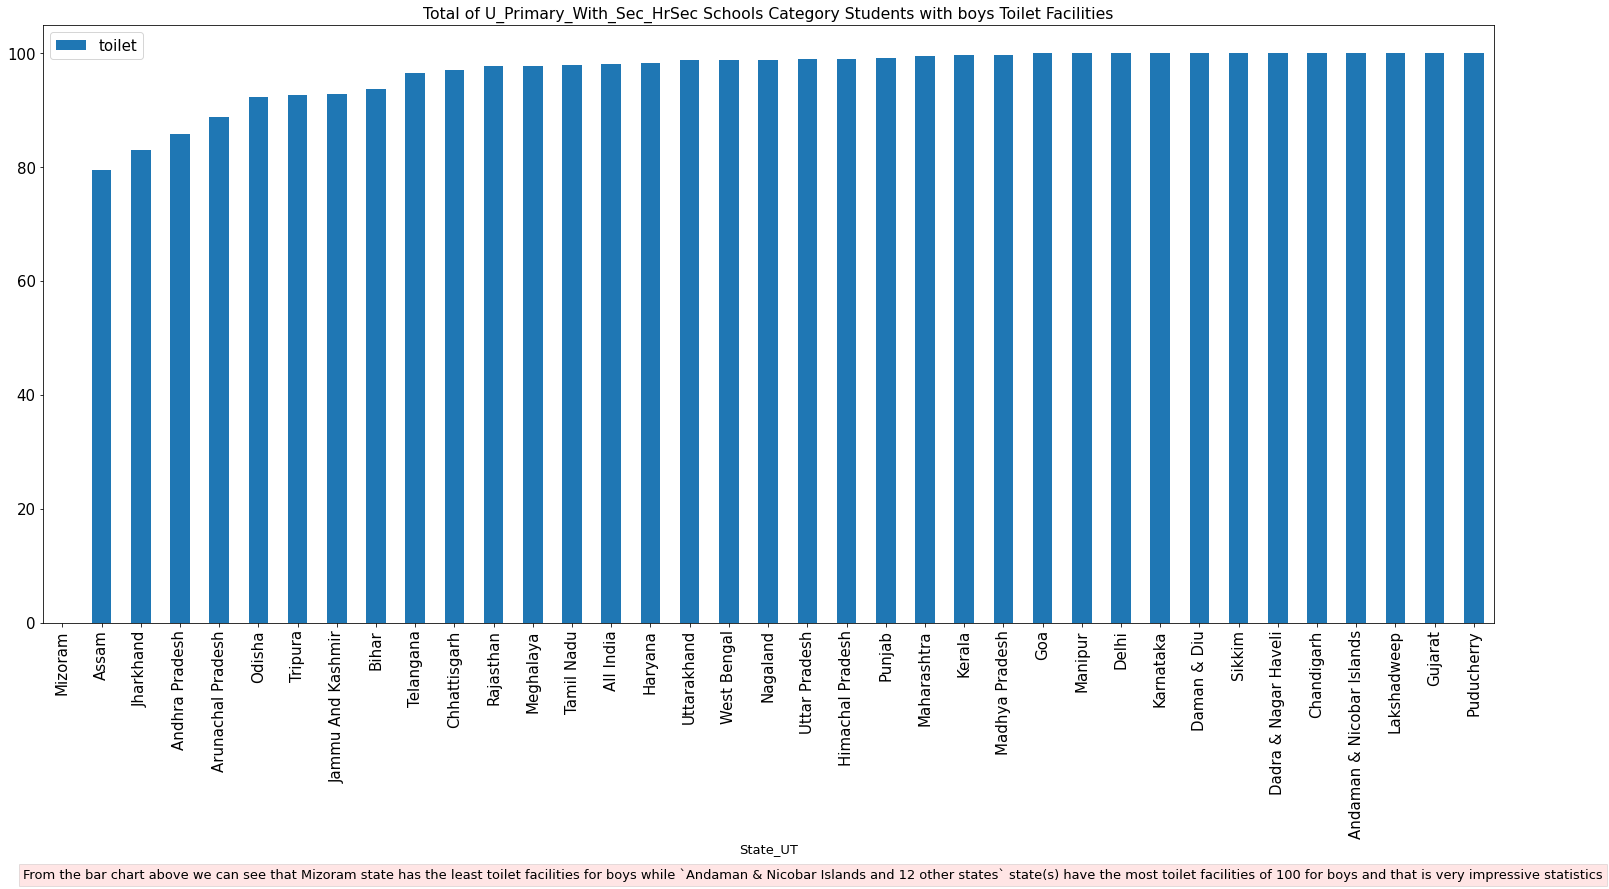

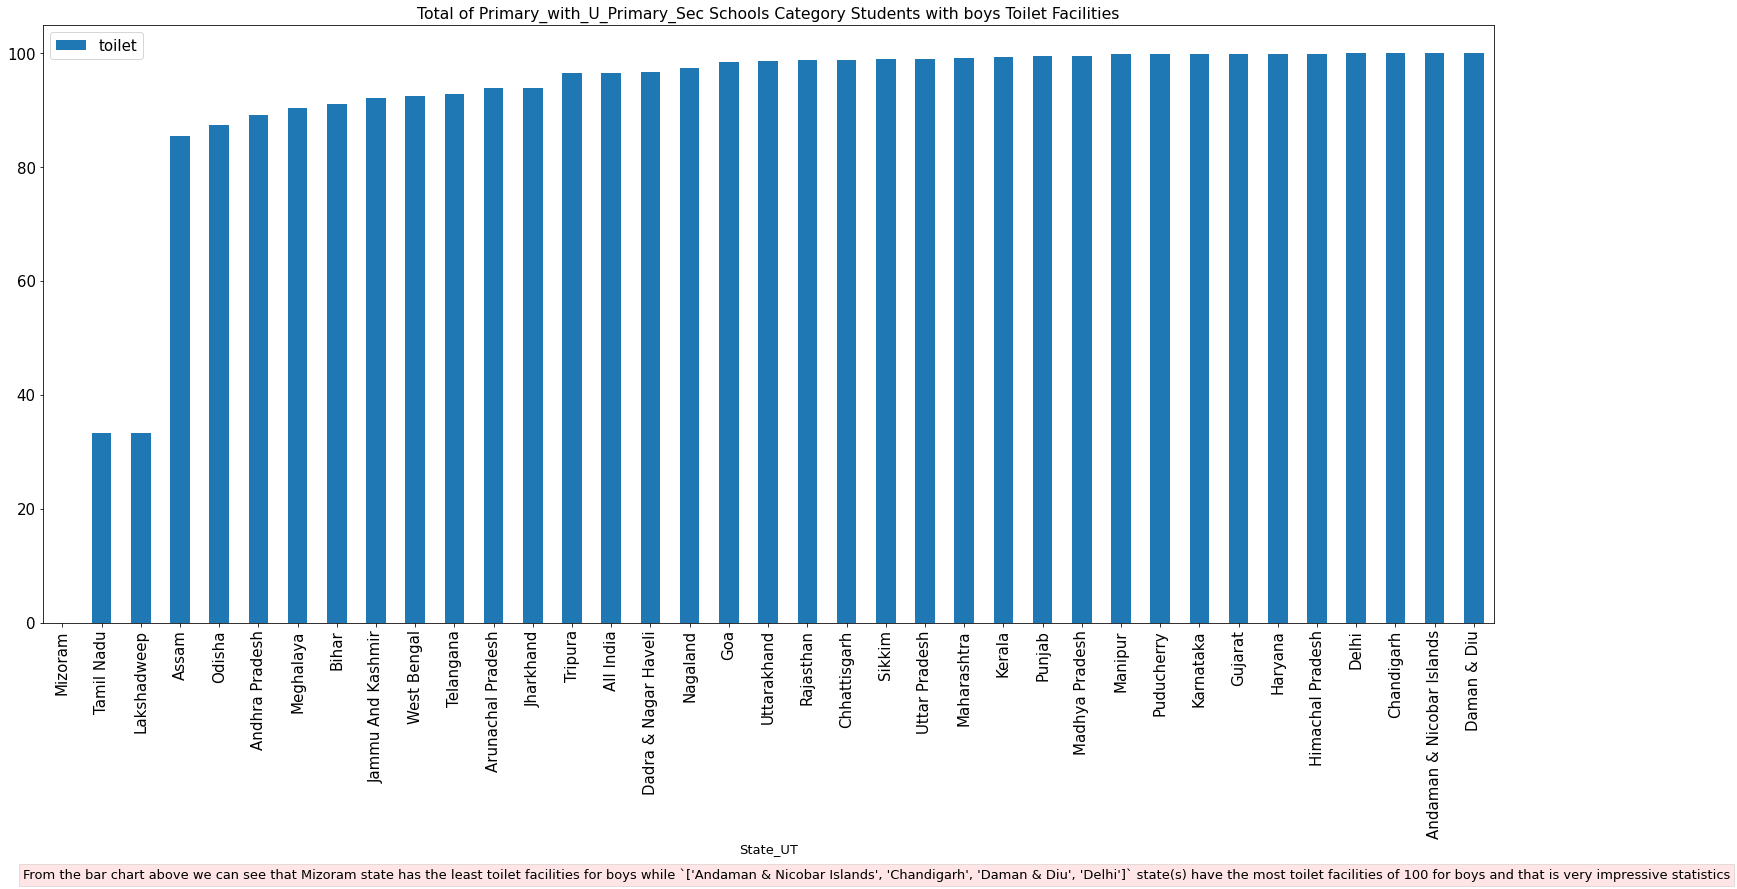

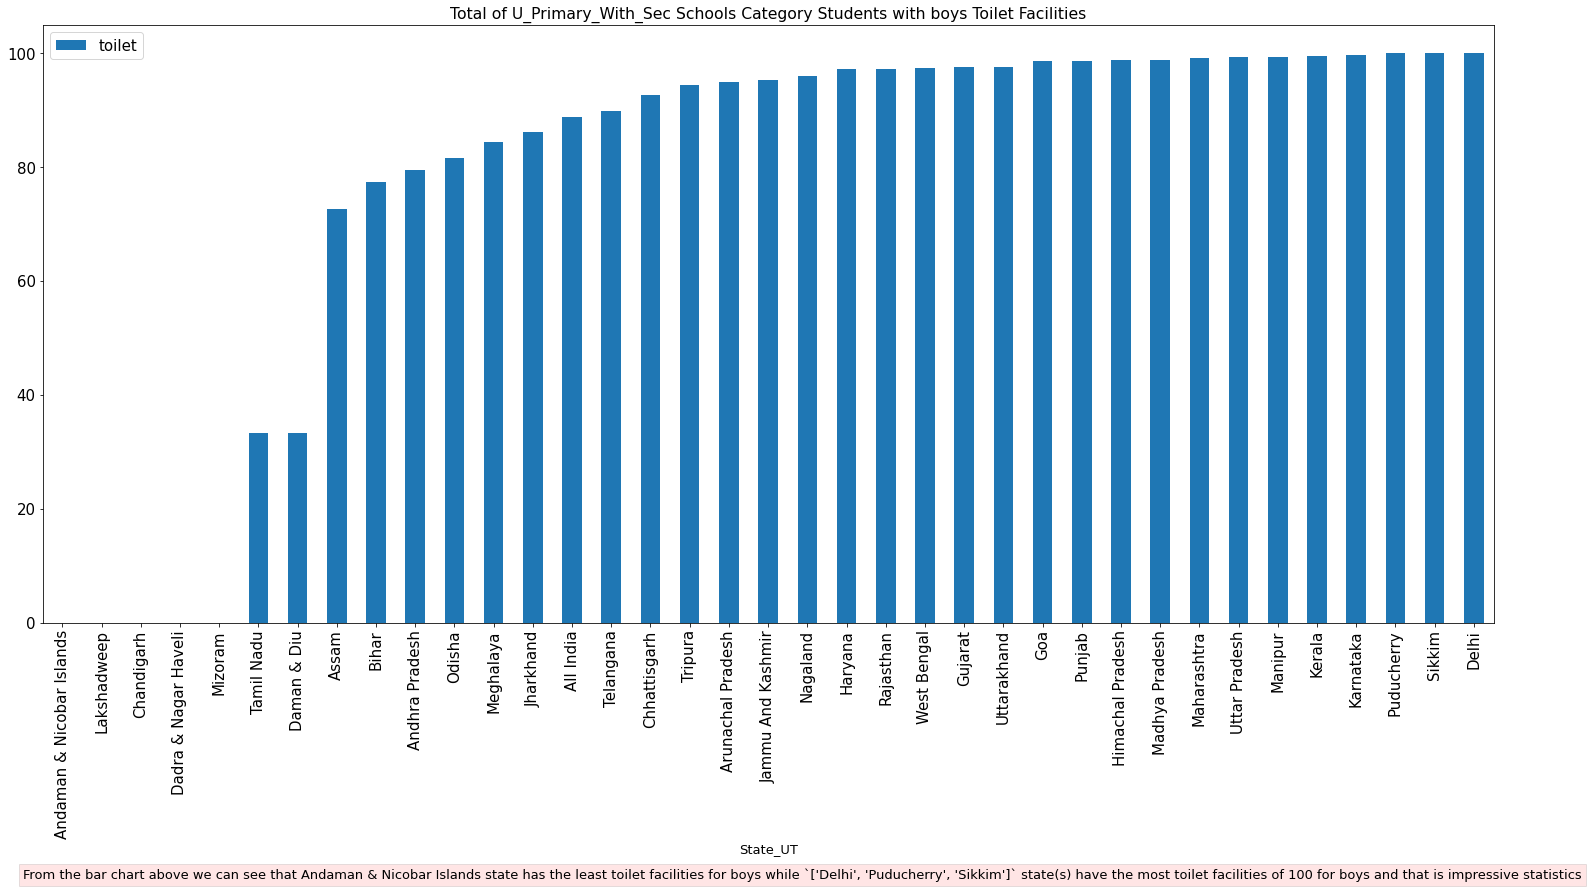

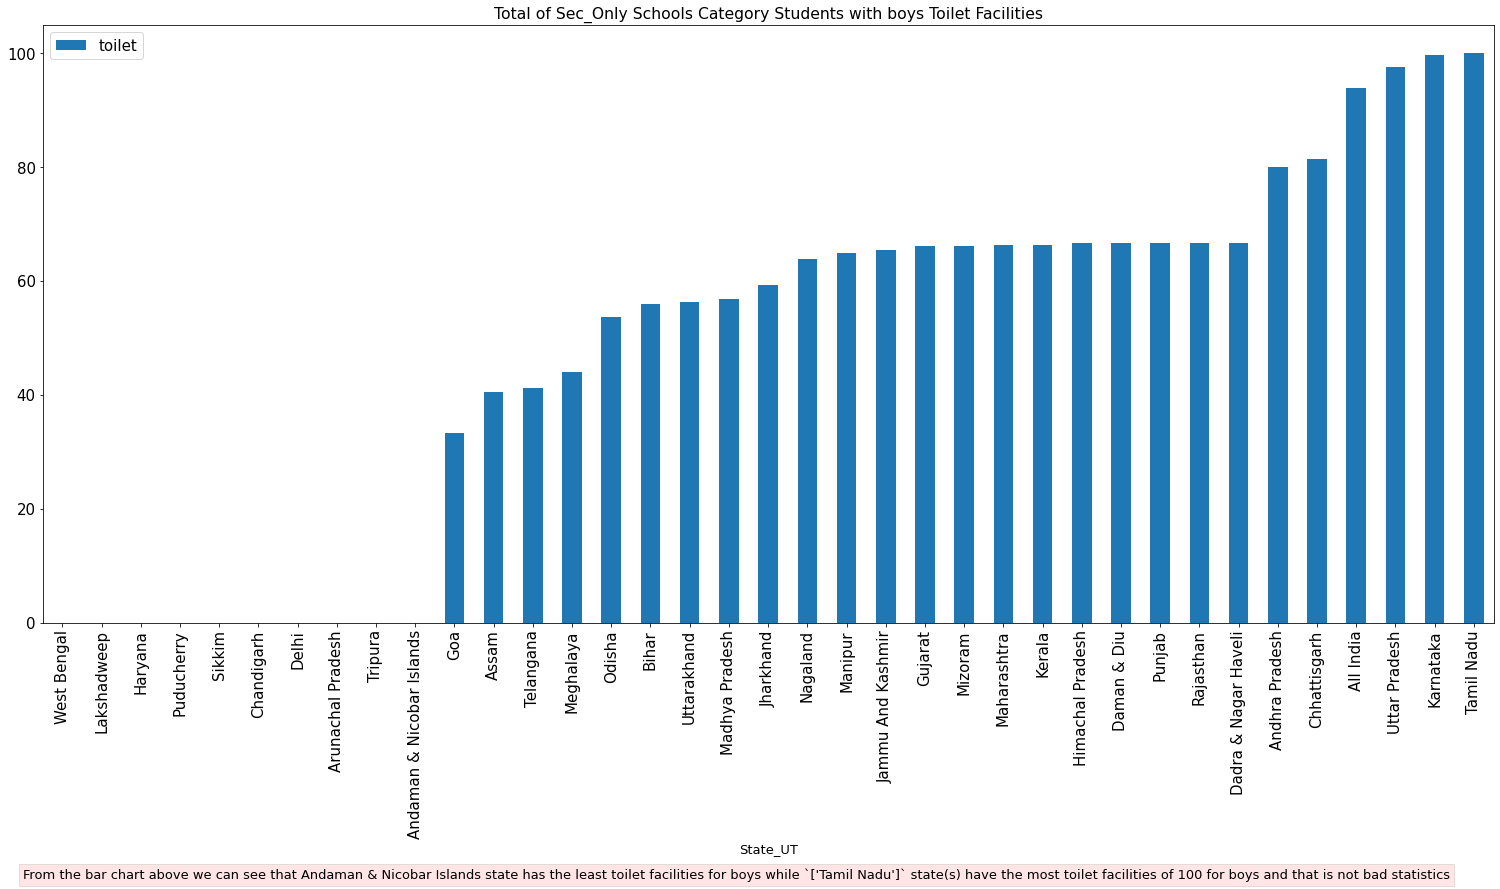

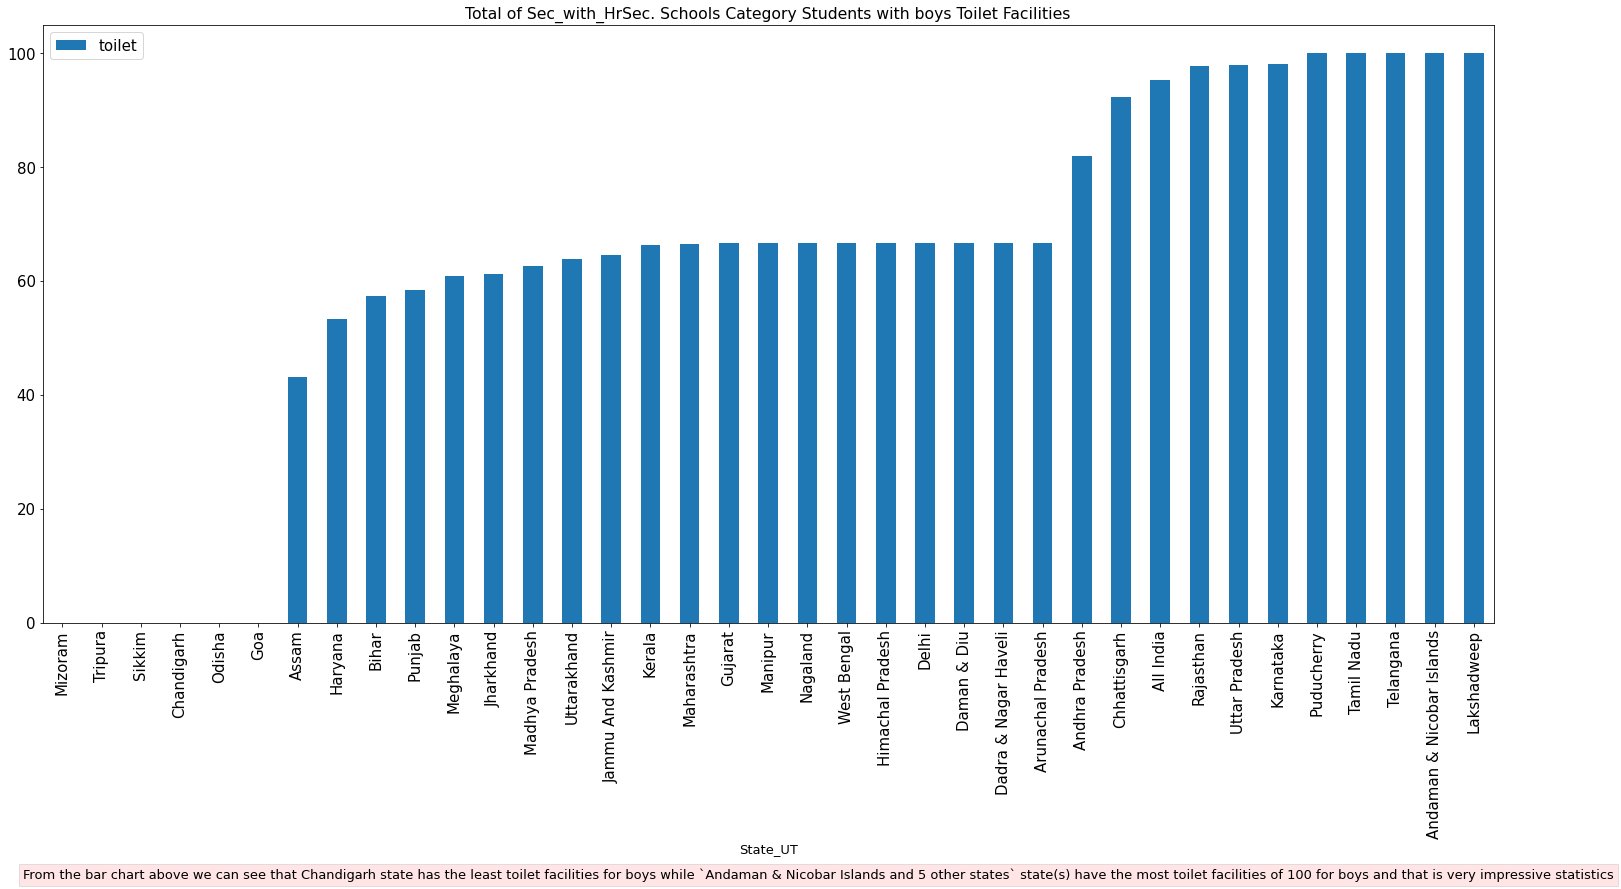

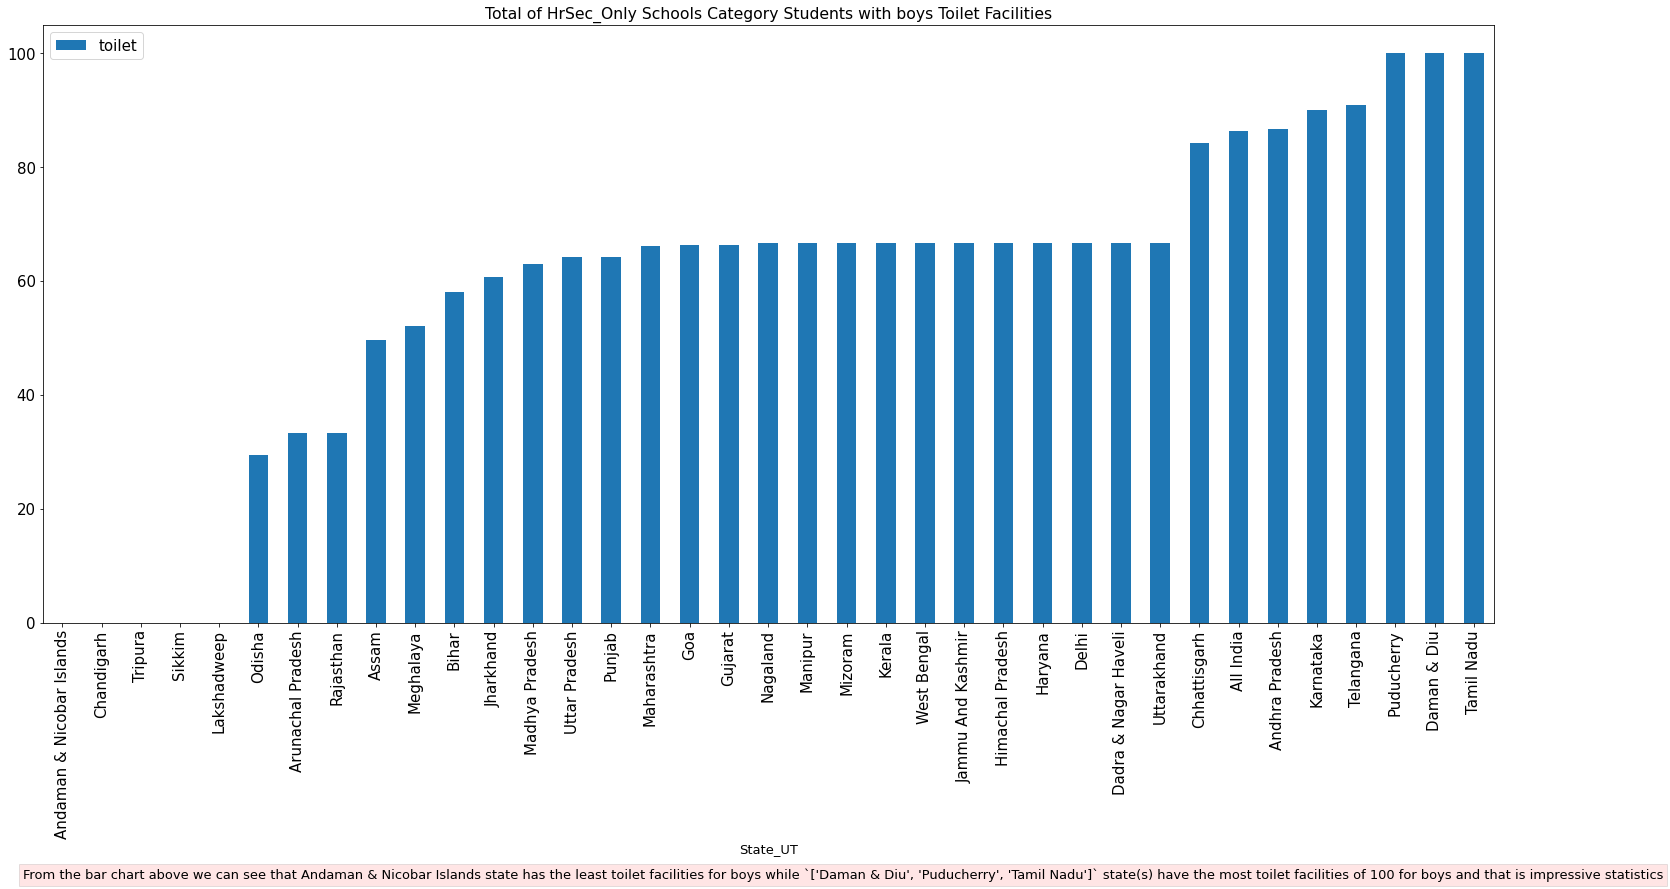

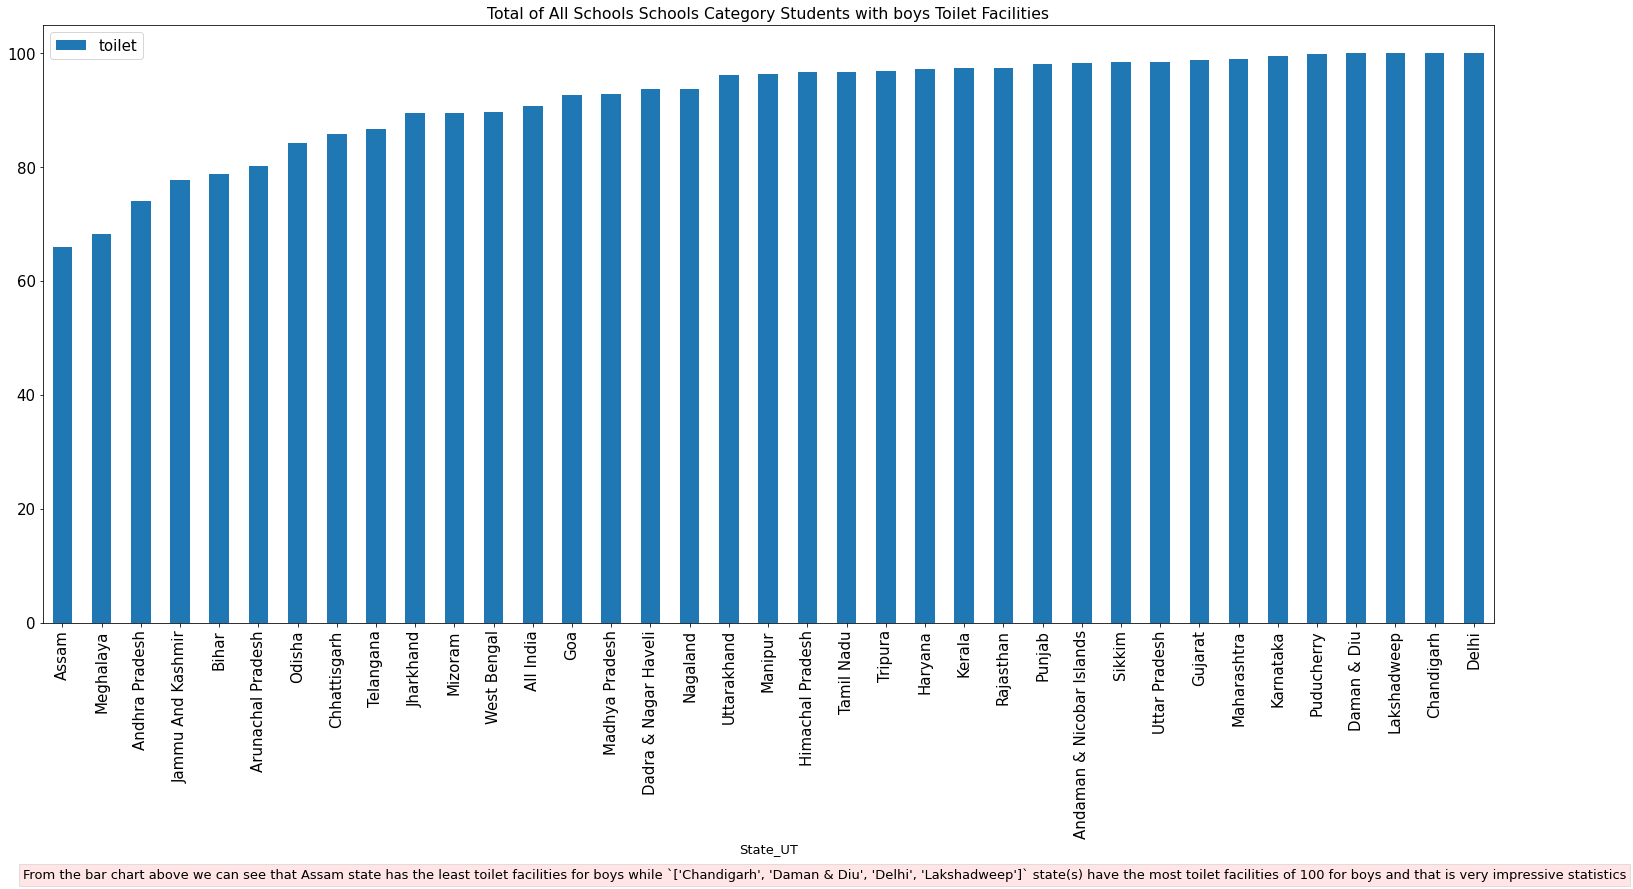

In [9]:
for category in categ:
    tmp_boys = boys_melted[boys_melted['School_Level'] == category]
    mean_tmp_boys = tmp_boys.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_boys.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with boys Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_boys.iloc[np.where(mean_tmp_boys['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_boys.iloc[mean_tmp_boys.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest)) # In the case when we have to many states that have 100 toilet facilities and can't display all
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for boys while `{}` state(s) have the most toilet facilities of 100 for boys and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))


## Toilet Facilities for girls in all Student category type 

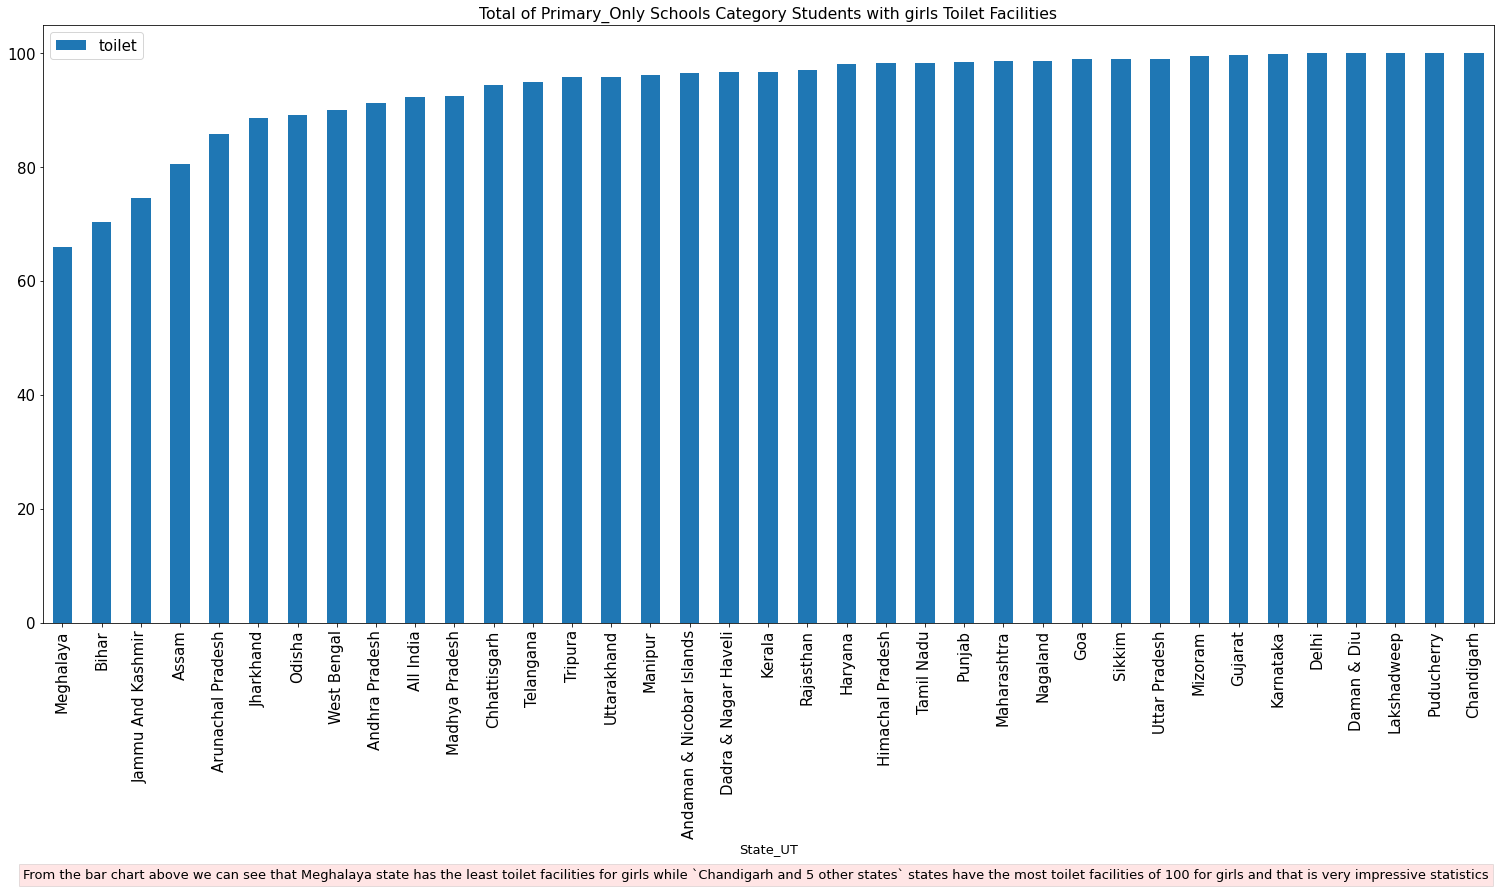

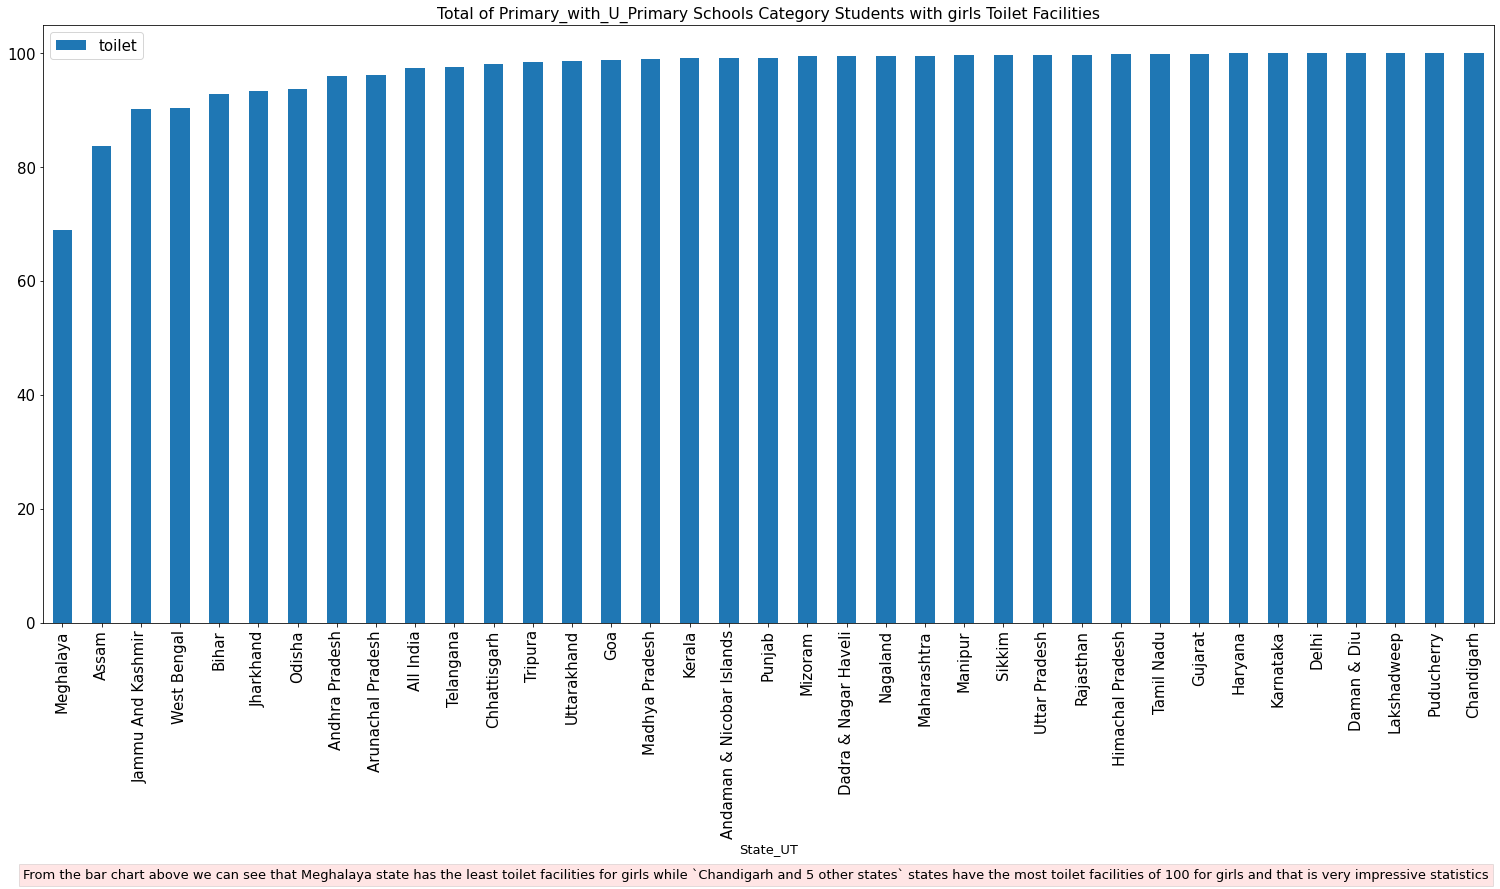

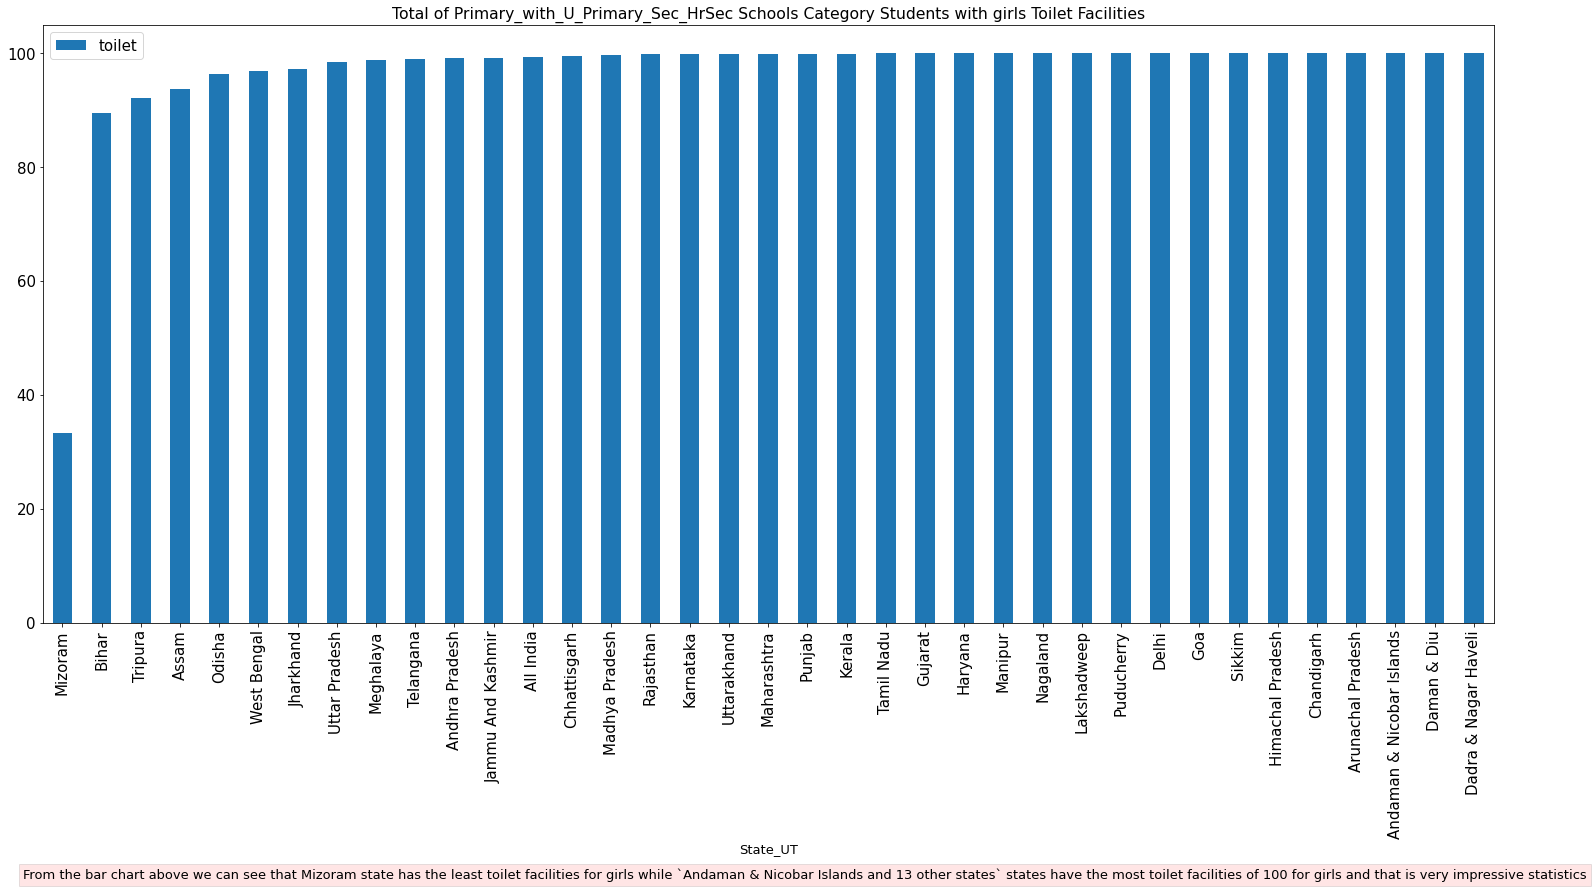

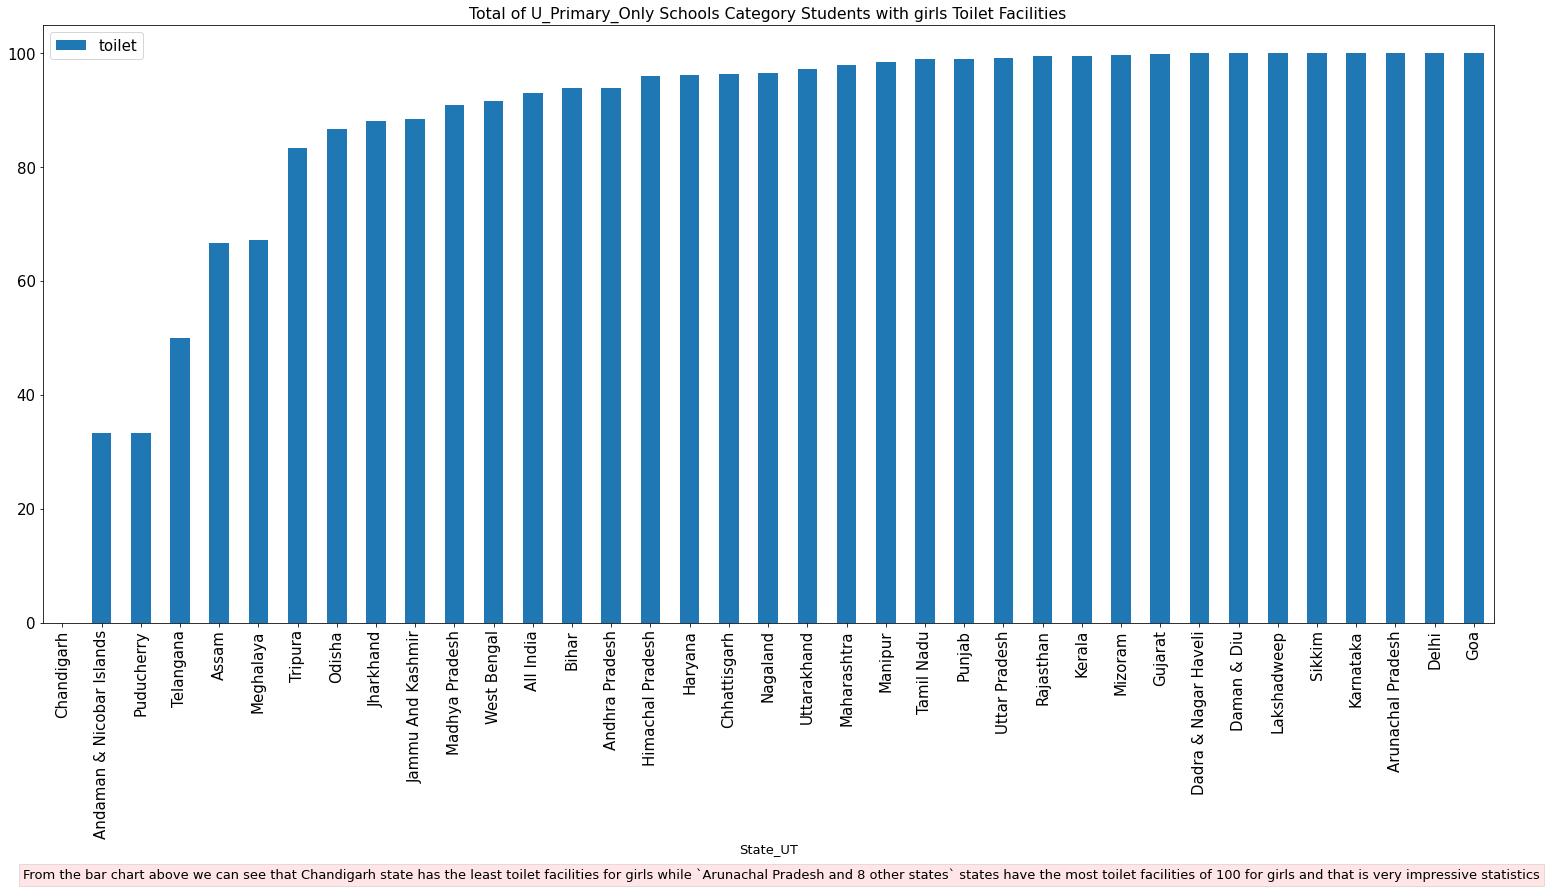

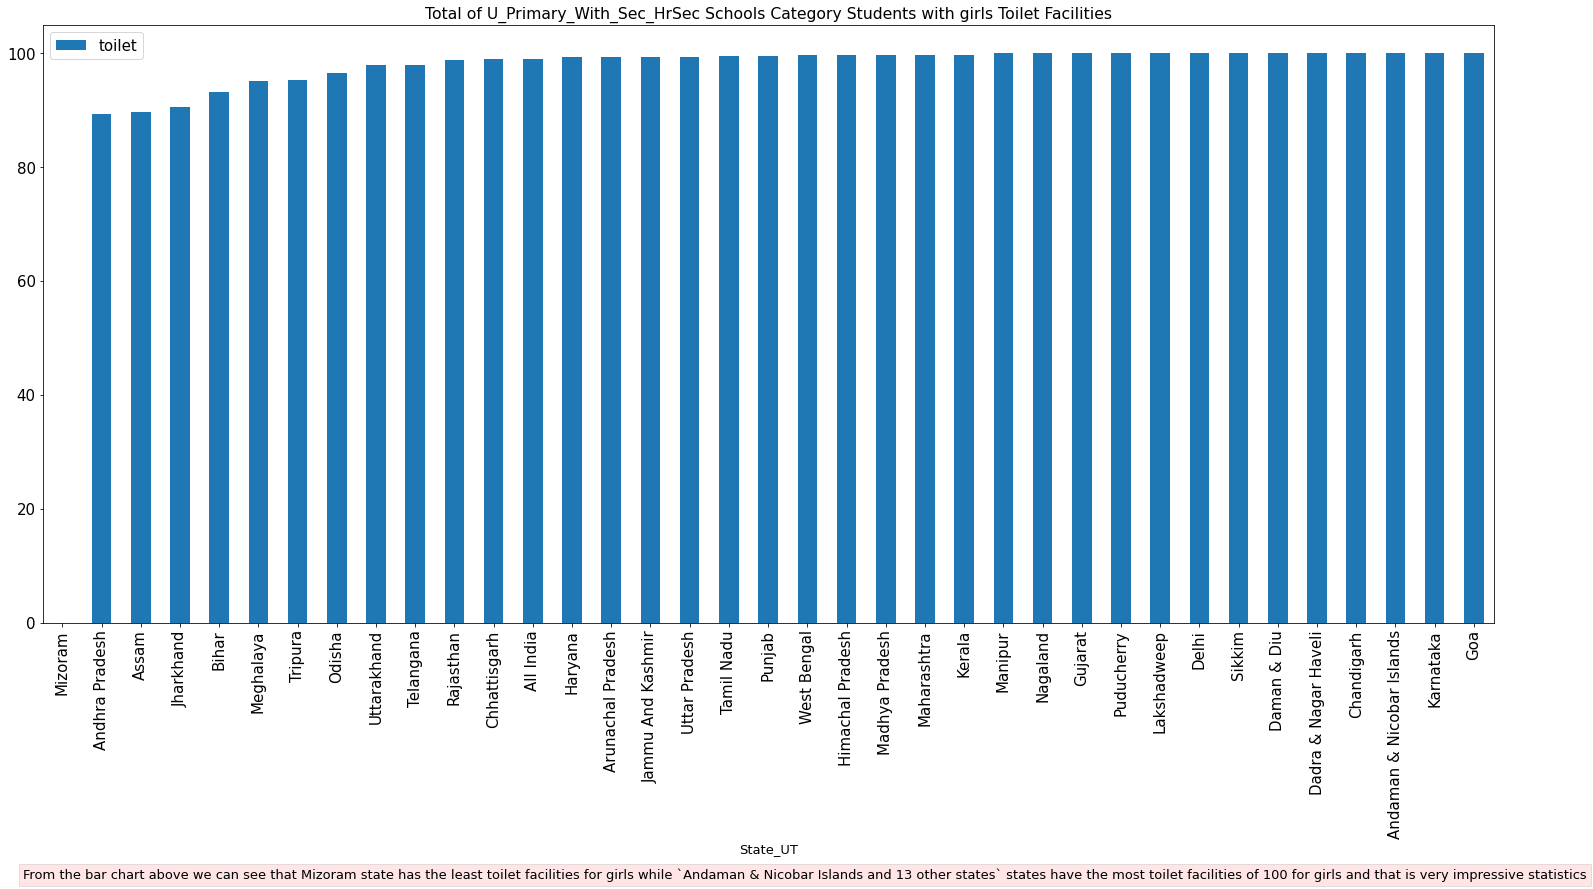

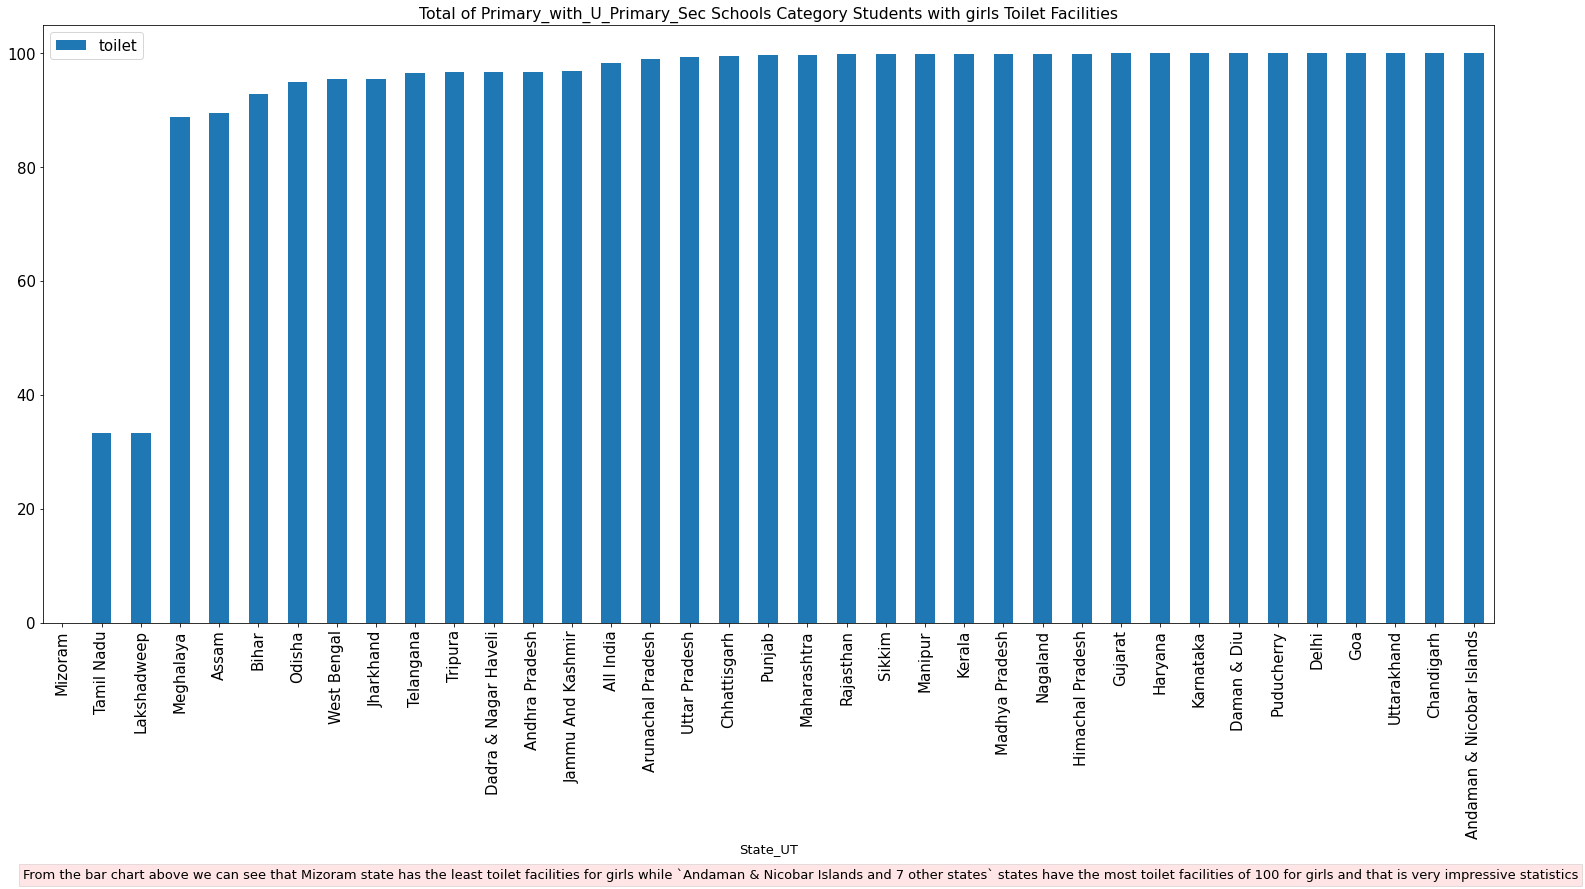

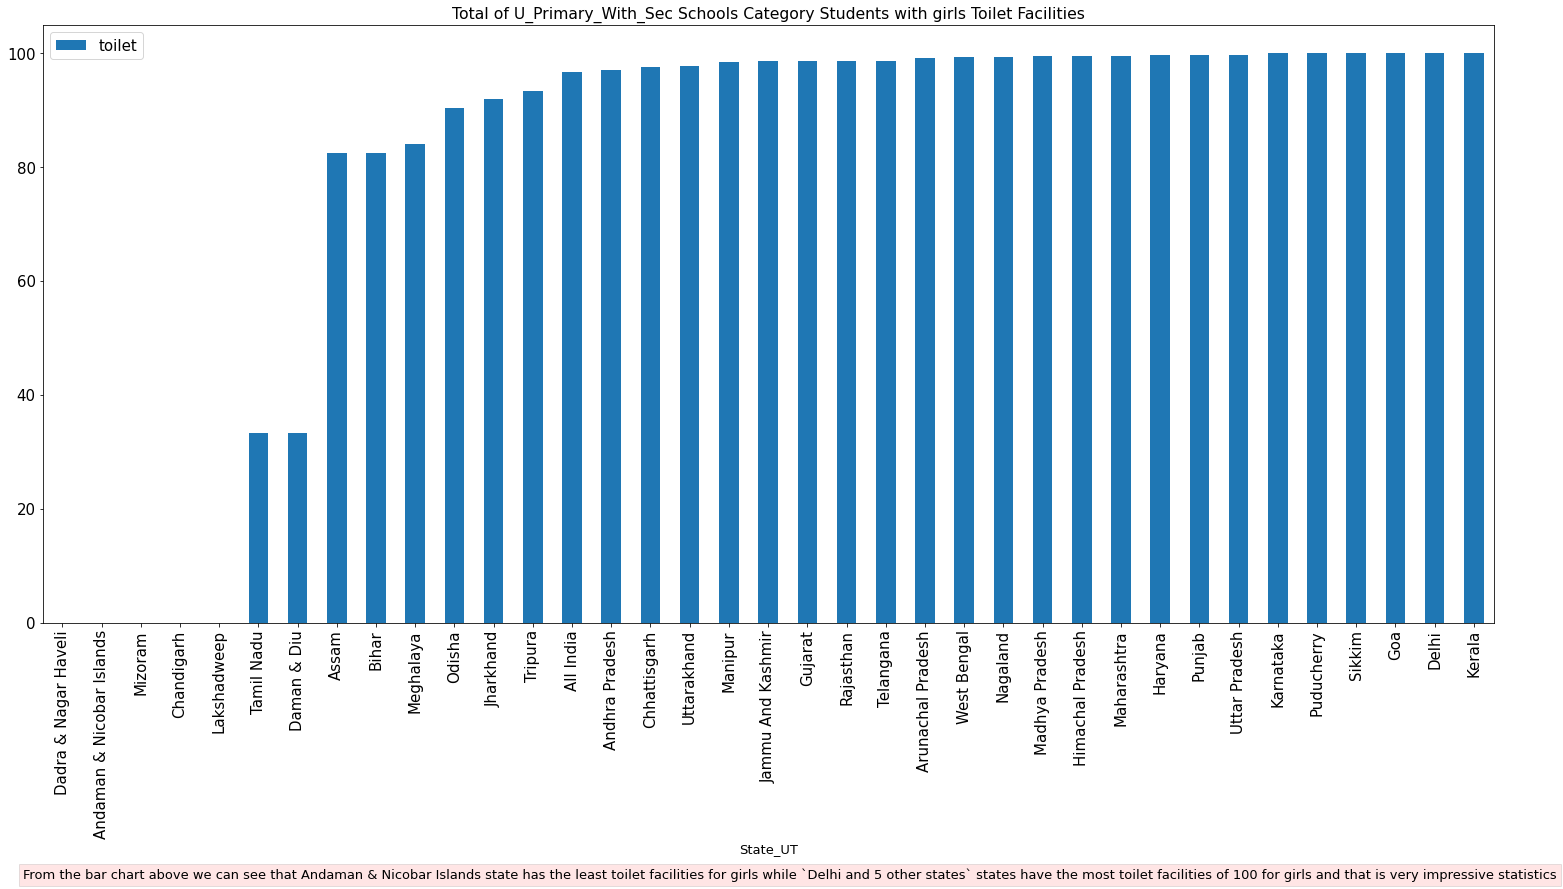

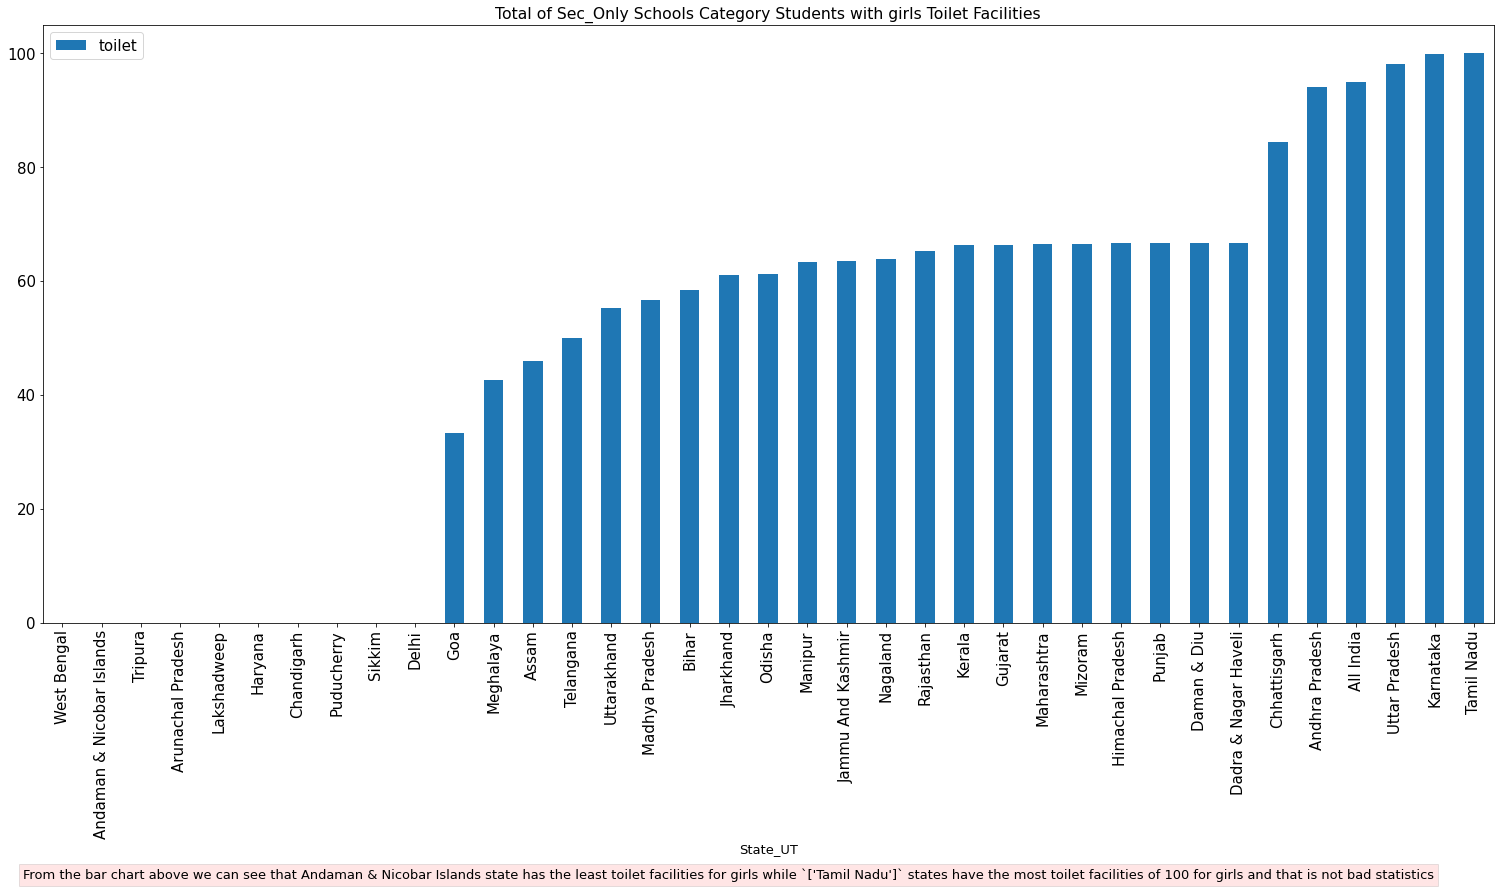

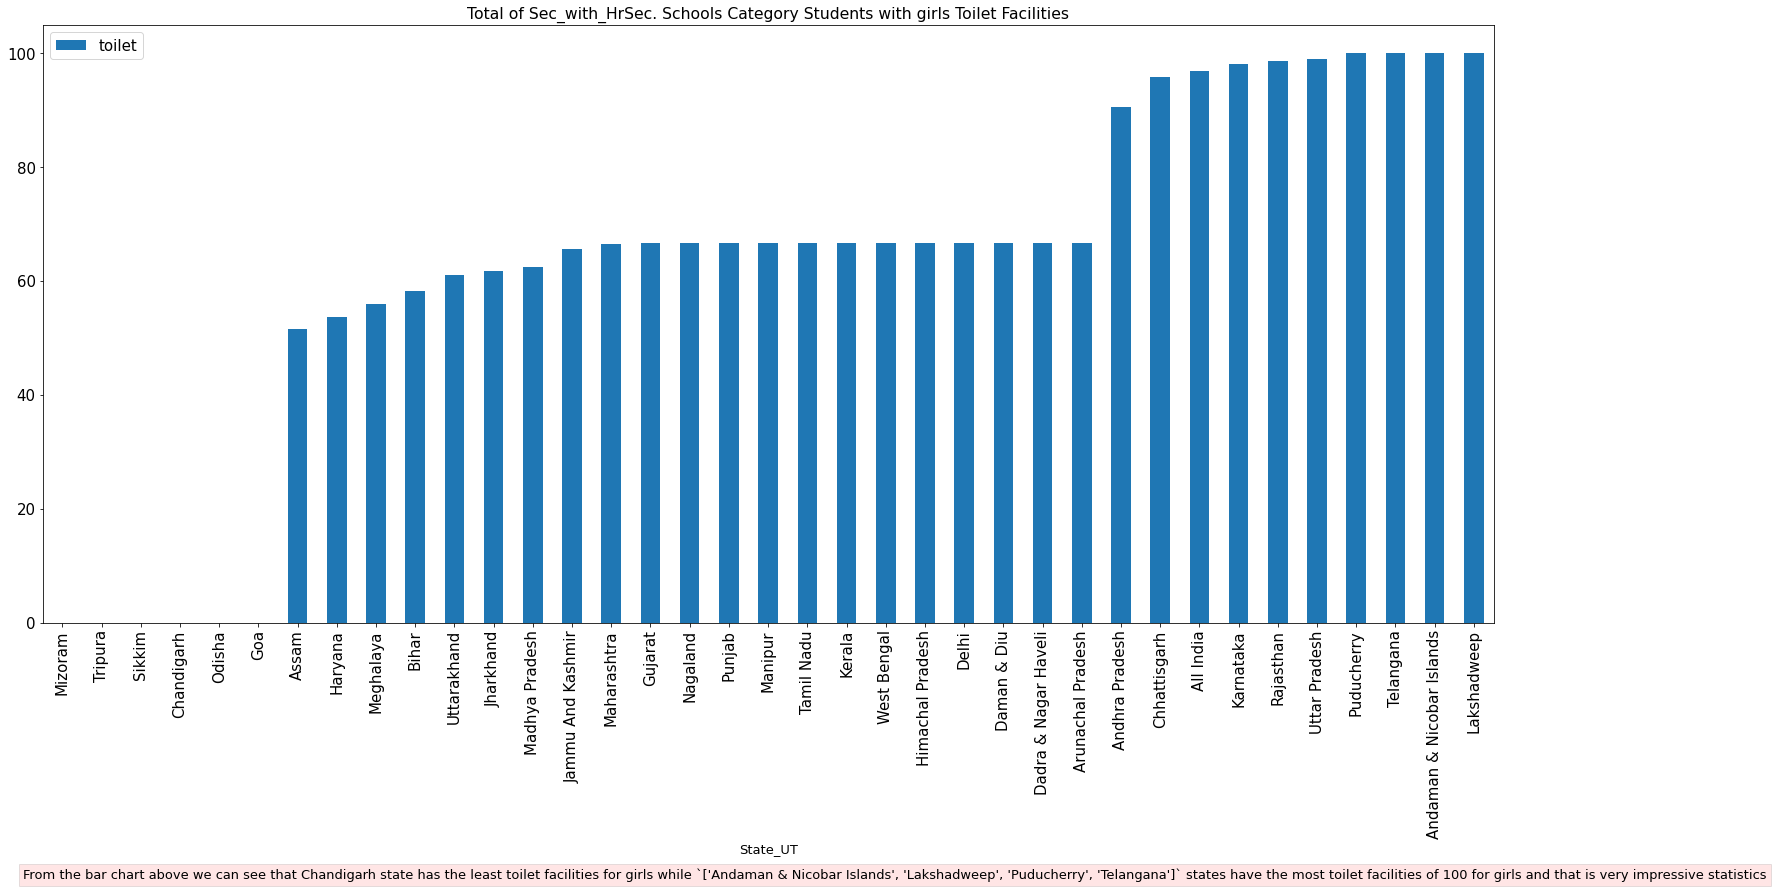

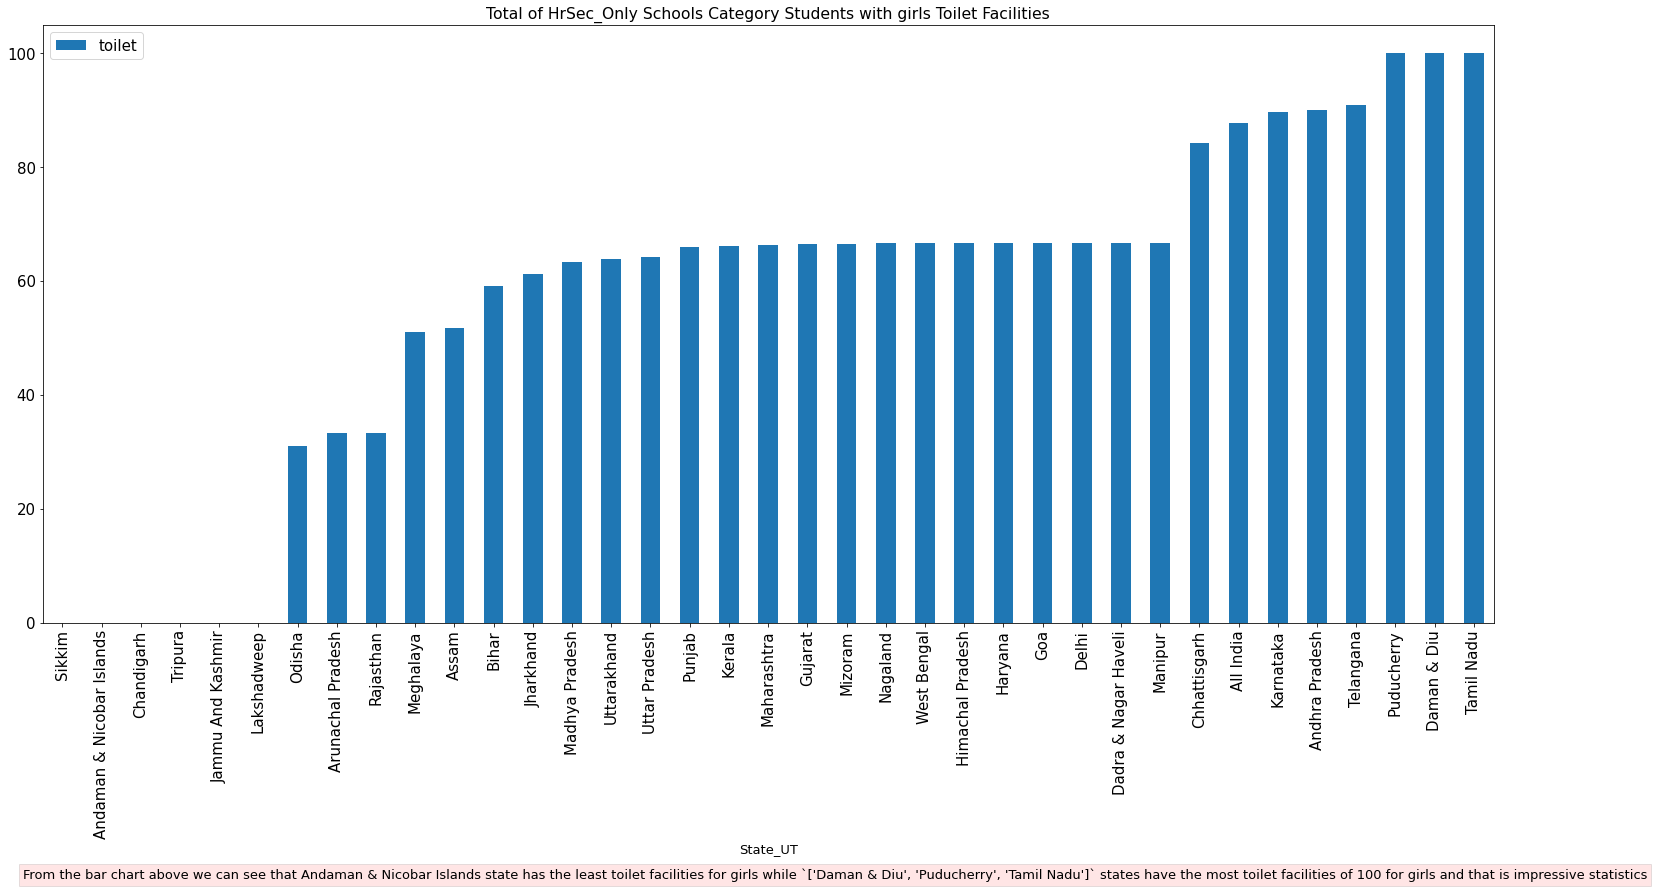

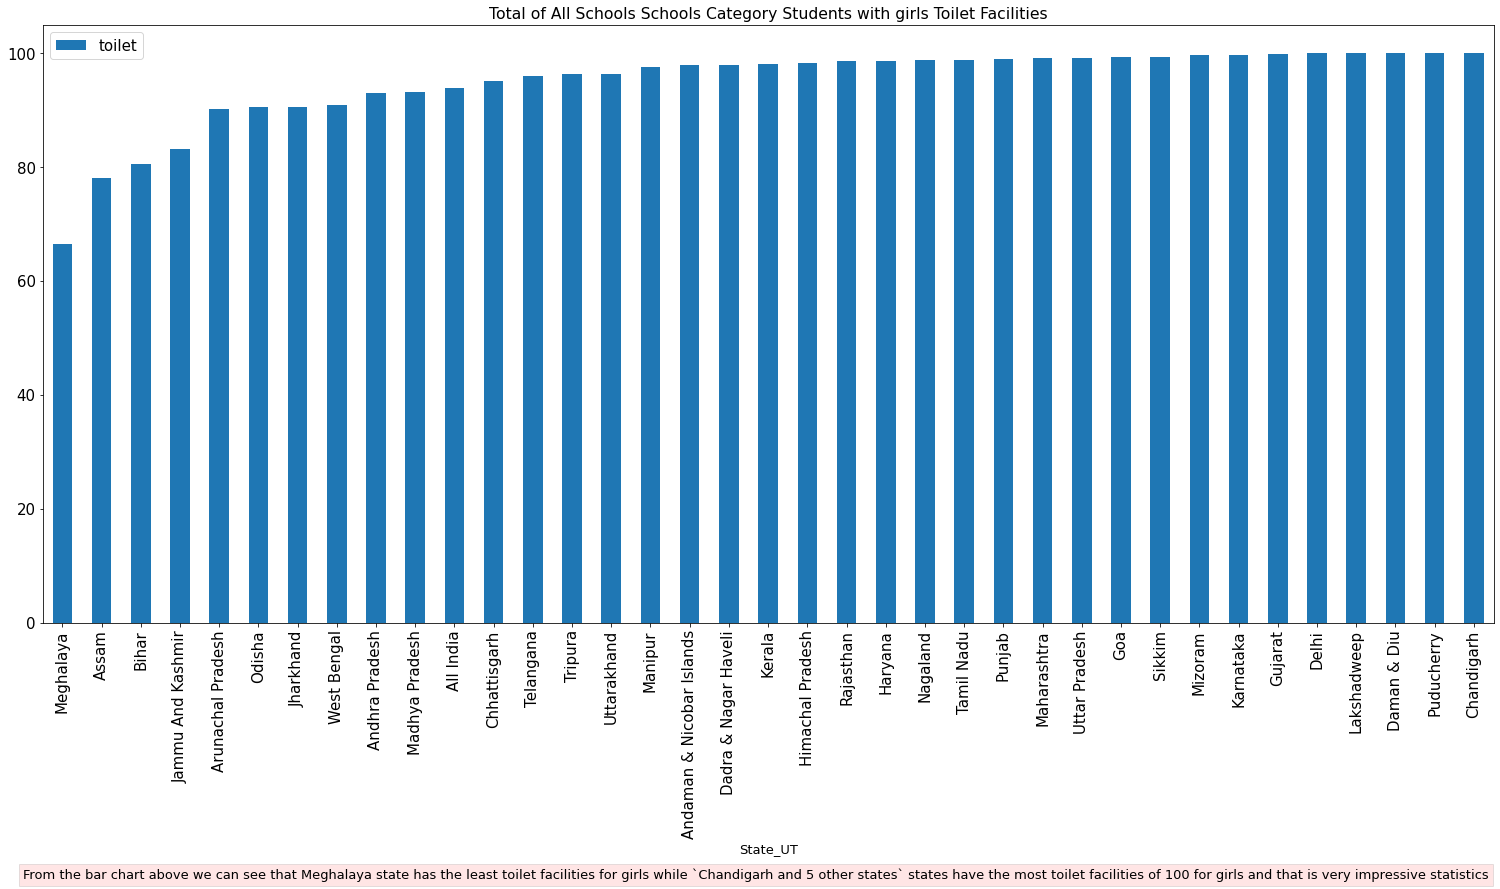

In [10]:
for category in categ:
    tmp_girls = girls_melted[girls_melted['School_Level'] == category]
    mean_tmp_girls = tmp_girls.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_girls.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with girls Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_girls.iloc[np.where(mean_tmp_girls['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_girls.iloc[mean_tmp_girls.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest))
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for girls while `{}` states have the most toilet facilities of 100 for girls and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))


## Toilet Facilities in 2013-2014 session

## Boys

In [11]:
boys_2013 = boys_melted.iloc[np.where(boys_melted.year=='2013-14')]

In [12]:
boys_2013.head(3)
boys_2013.shape

(396, 4)

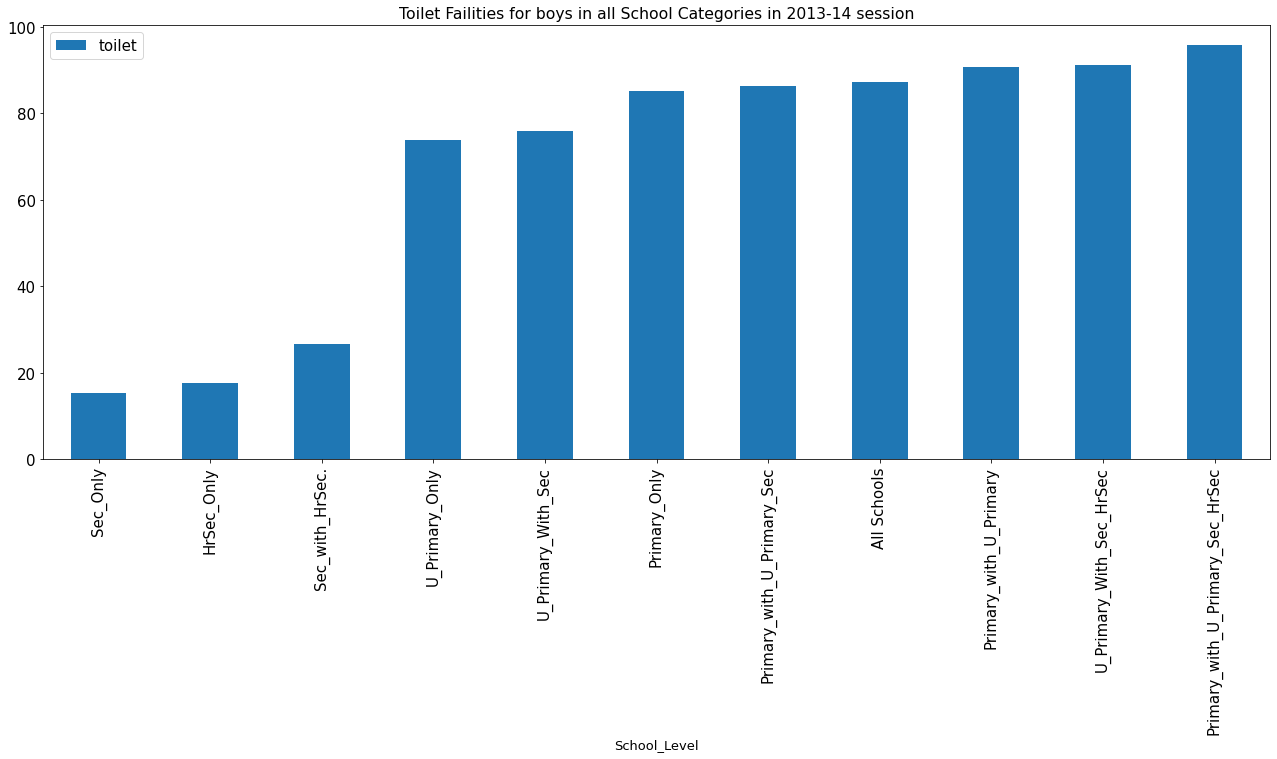

In [13]:
boys_2013.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2013-14 session')

## From the bar chart above we can clearly see that toilets facilities weren't much in secondary schools in 2013-14 session

## Toilet Facilities(BOYS) in 2014-2015 session

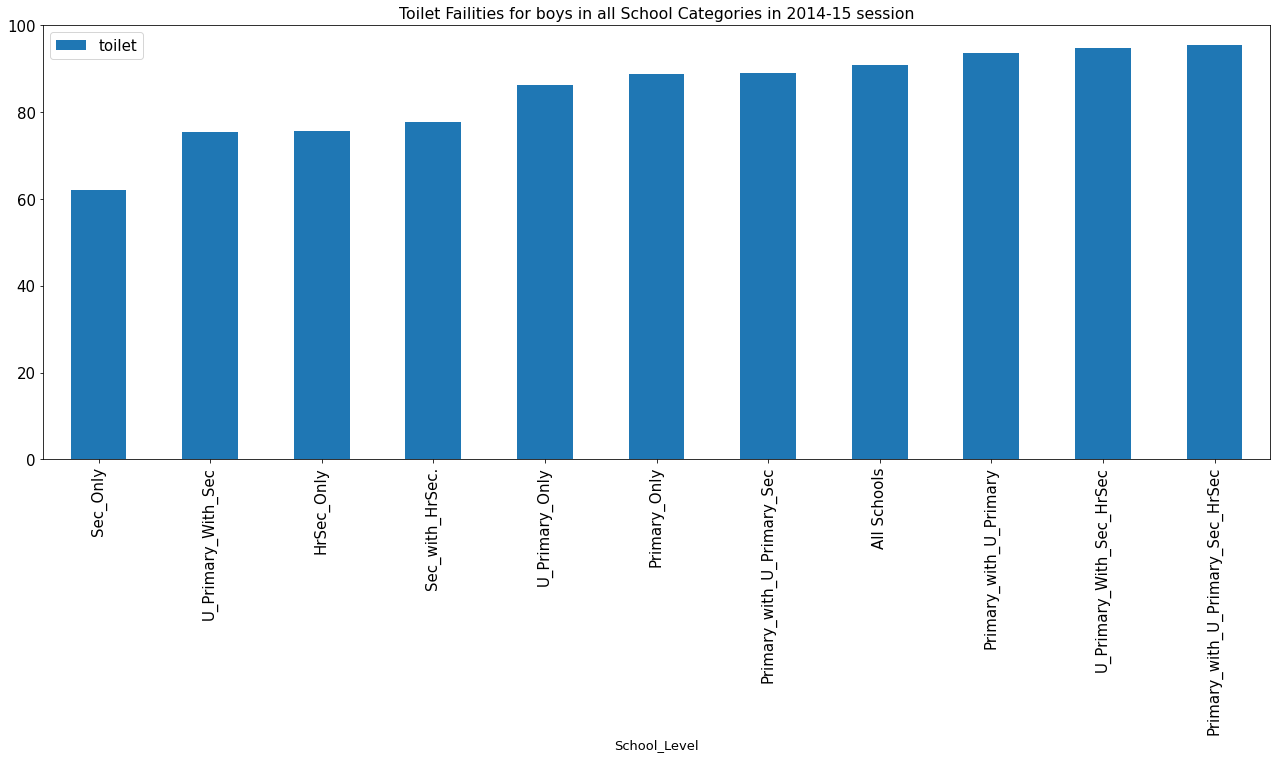

In [14]:
boys_2014 = boys_melted.iloc[np.where(boys_melted.year=='2014-15')]

boys_2014.head(3)
boys_2014.shape

boys_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2014-15 session')

## From the bar chart above we can see rapid rise in the toilets facilities of in secondary schools in 2014-15 session, compared to last session, this is a big improvement

## Toilet Facilities(BOYS) in 2015-2016 session

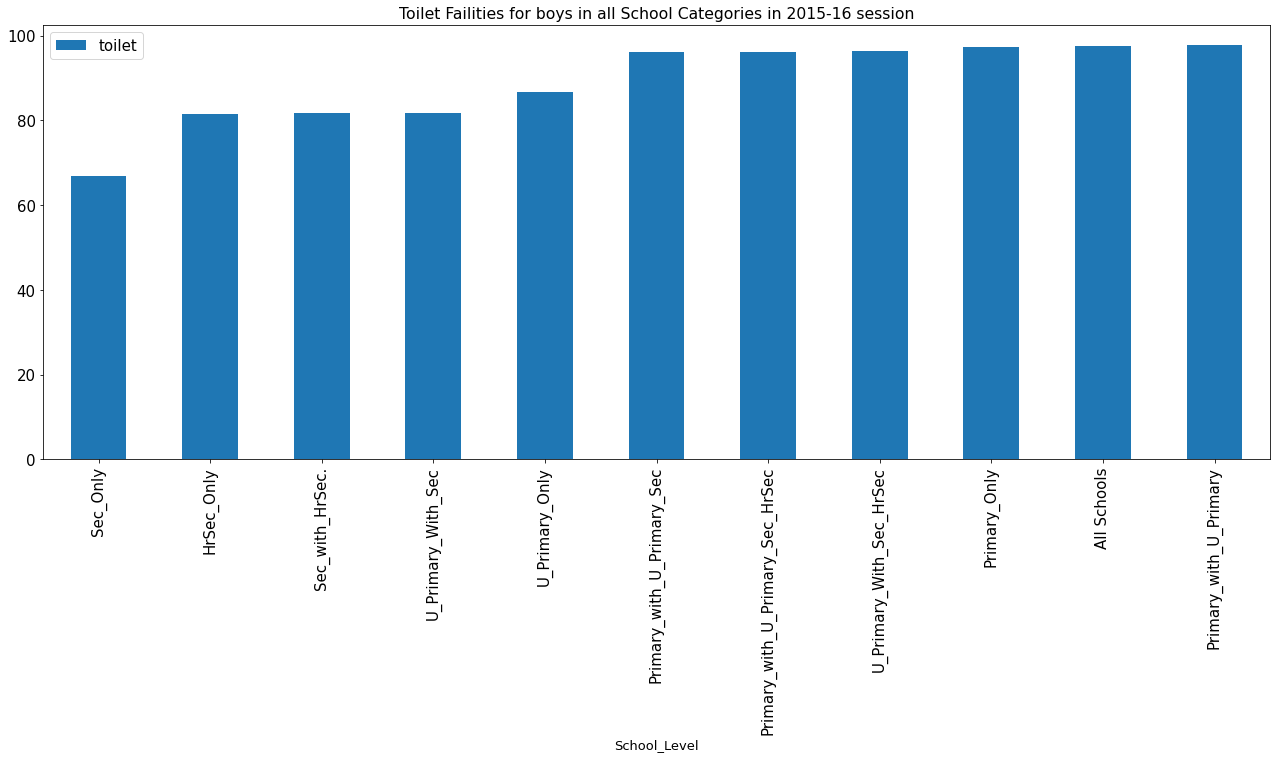

In [15]:
boys_2015 = boys_melted.iloc[np.where(boys_melted.year=='2015-16')]

boys_2015.head(3)
boys_2015.shape

boys_2015.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2015-16 session')

### There's little increase in the toilet facilities for secondary school students

## Toilet Facilities in 2013-2014 session

## Girls

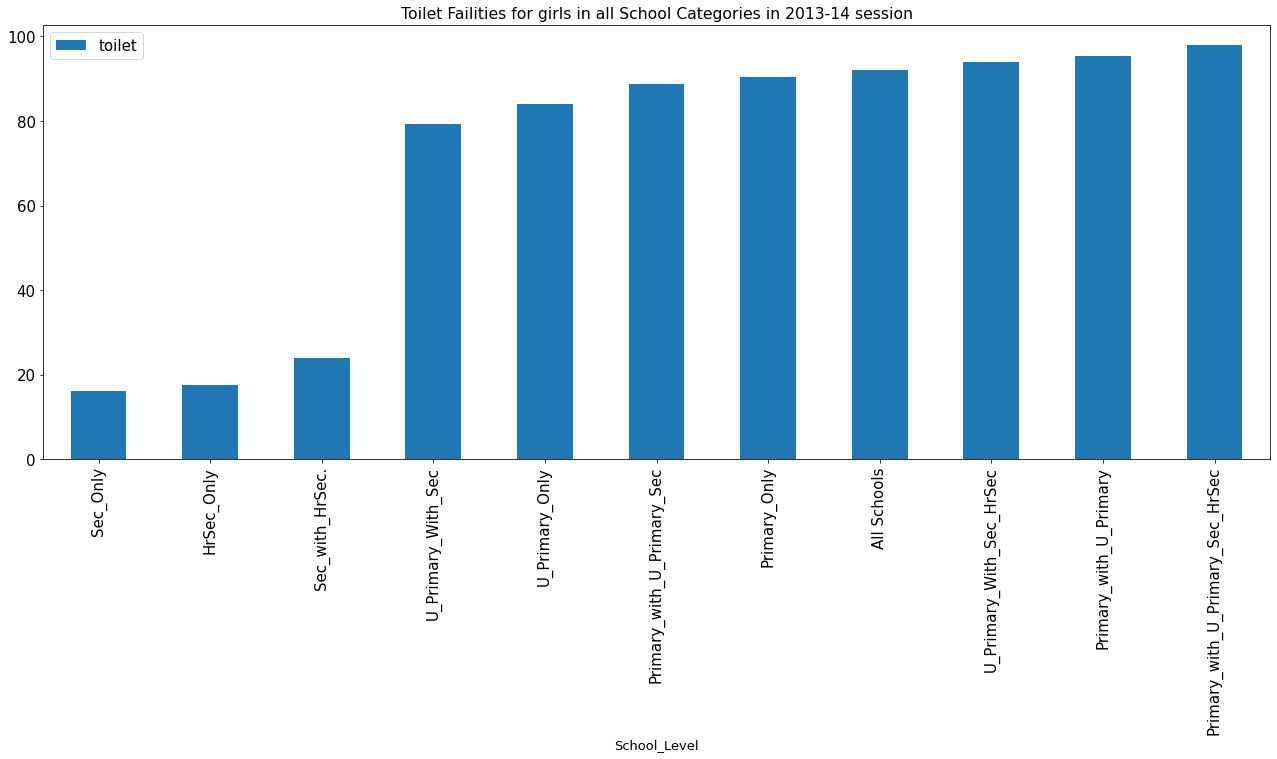

In [16]:
girls_2013 = girls_melted.iloc[np.where(girls_melted.year=='2013-14')]

girls_2013.head(3)
girls_2013.shape

girls_2013.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2013-14 session')

## Same trend of awful toilet facilities for secondary school students in 2013-14 session.

## Toilet Facilities in 2014-2015 session

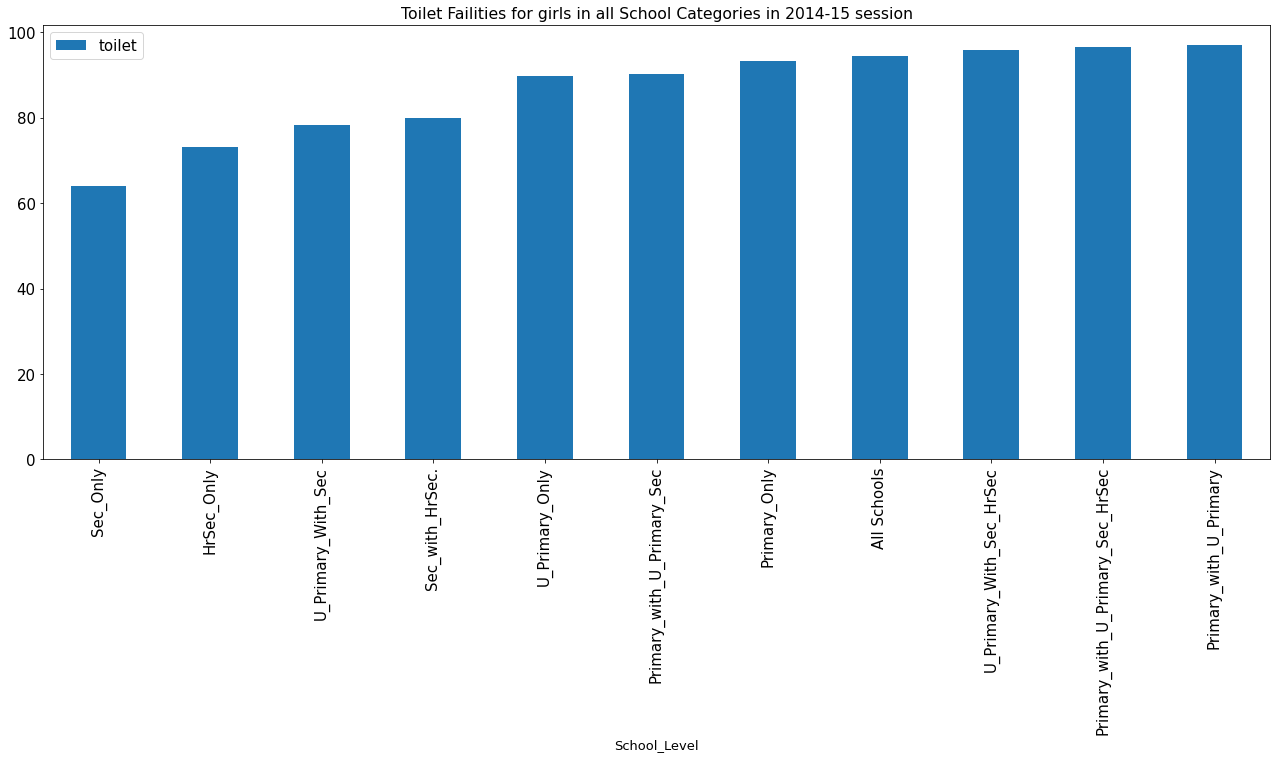

In [17]:
girls_2014 = girls_melted.iloc[np.where(girls_melted.year=='2014-15')]

girls_2014.head(3)
girls_2014.shape

girls_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2014-15 session')

## Once again rapid increse in the toilet facilities in the secondary school category in the 2014-15 session.

## Toilet Facilities in 2015-2016 session

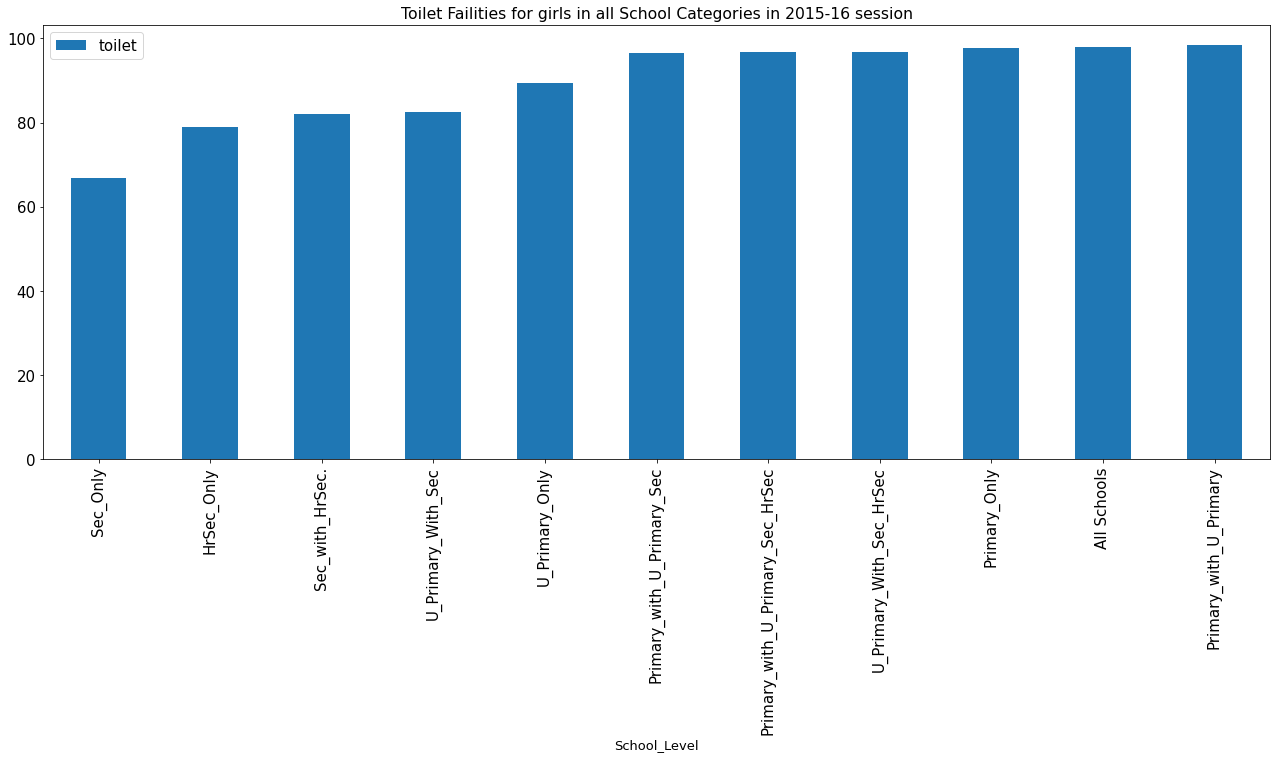

In [18]:
girls_2015 = girls_melted.iloc[np.where(girls_melted.year=='2015-16')]

girls_2015.head(3)
girls_2015.shape

girls_2015.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2015-16 session')

### There's little increase in the toilet facilities of secondary school students

## Toilet Facillities based on States location of Schools

## Boys

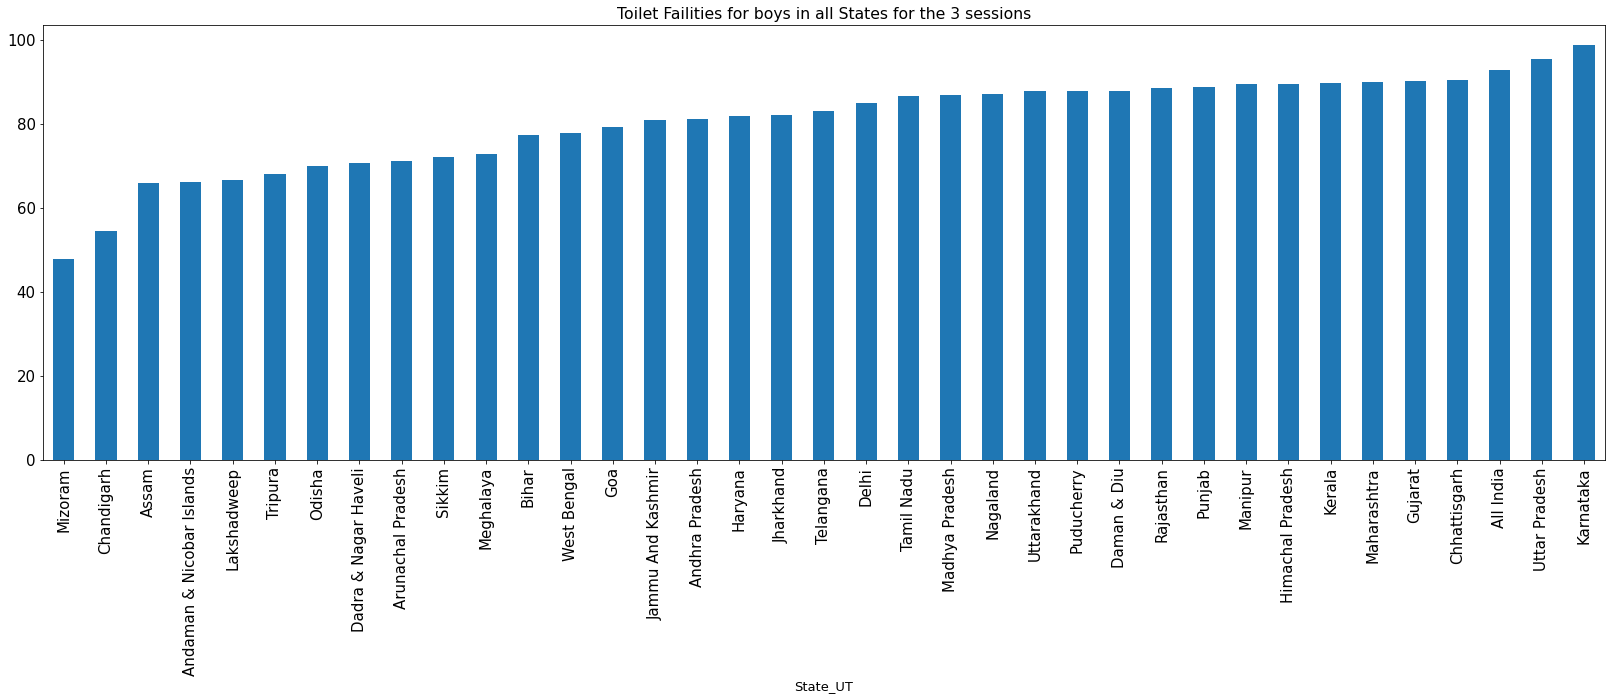

In [19]:
boys_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all States for the 3 sessions')

## We can see clearly that 'Mizoram' state has the poorest toilet facilities and 'Kamataka' has the best toilet facilities for boys.

## Toilet Facillities based on States location of Schools (2013-14)

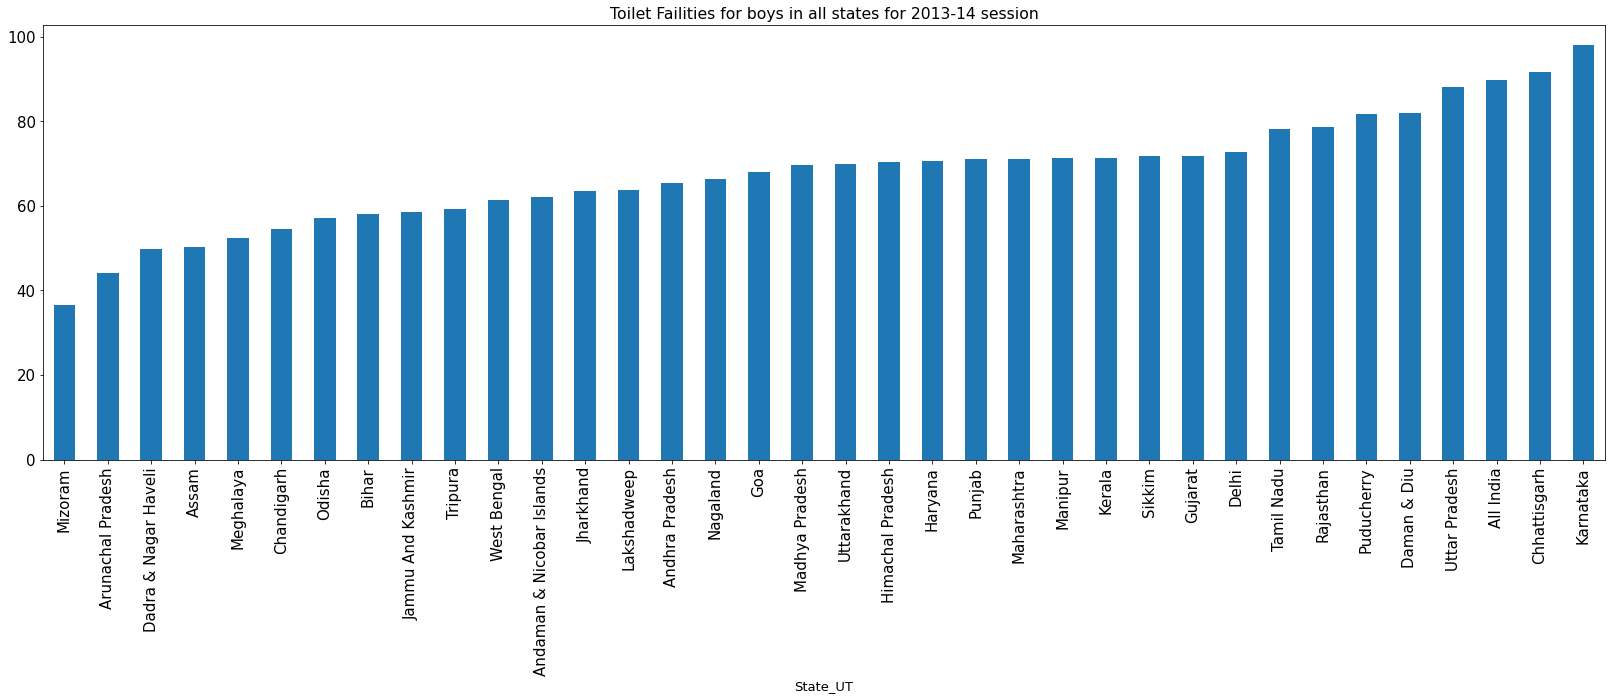

In [20]:
boys_2013.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all states for 2013-14 session')

### In the 2013-14 session 'Mizoram' state had the poorest toilet facility while 'Kamataka' had the best toilet facility for boys.

## Toilet Facillities based on States location of Schools (2014-15)

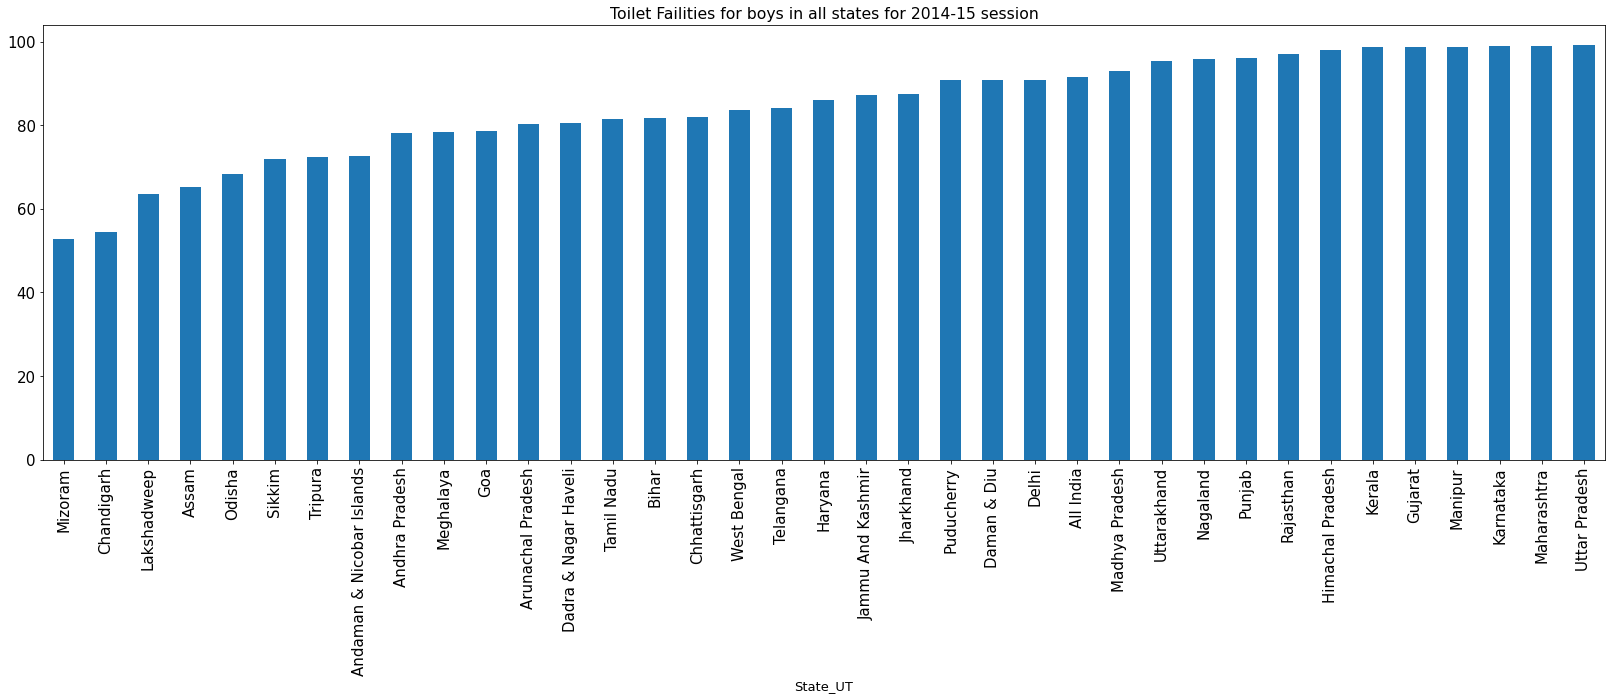

In [21]:
boys_2014.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all states for 2014-15 session')

### In the 2014-15 session 'Mizoram' state still had the poorest toilet facility while 'Uttar Pradesh' now had the best toilet facility for boys.

## Toilet Facillities based on States location of Schools (2015-16)

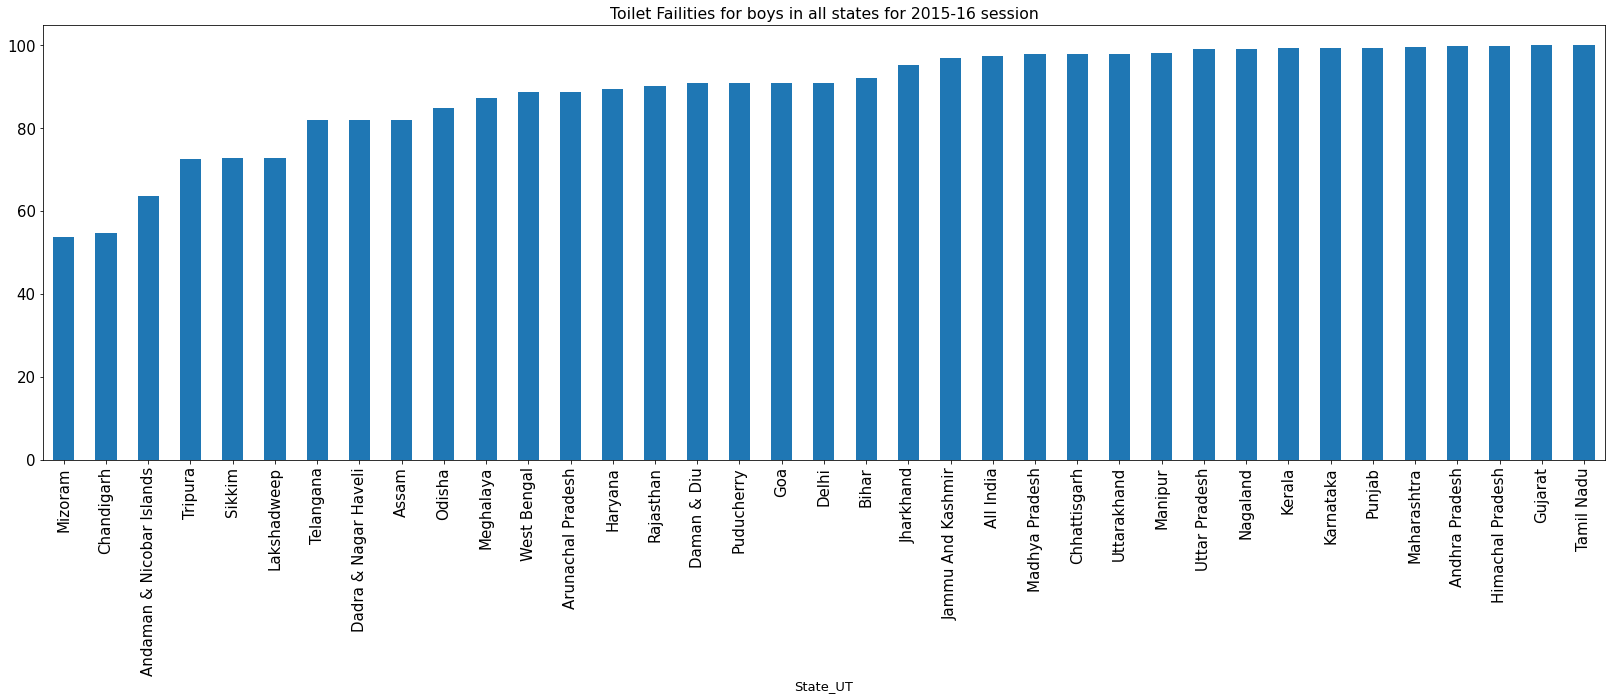

In [22]:
boys_2015.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all states for 2015-16 session')

### 'Mizoram' state still had the poorest toilet facility while 'Tamil Nadu' had the best toilet facility in 2015-16 session for boys.

## Girls

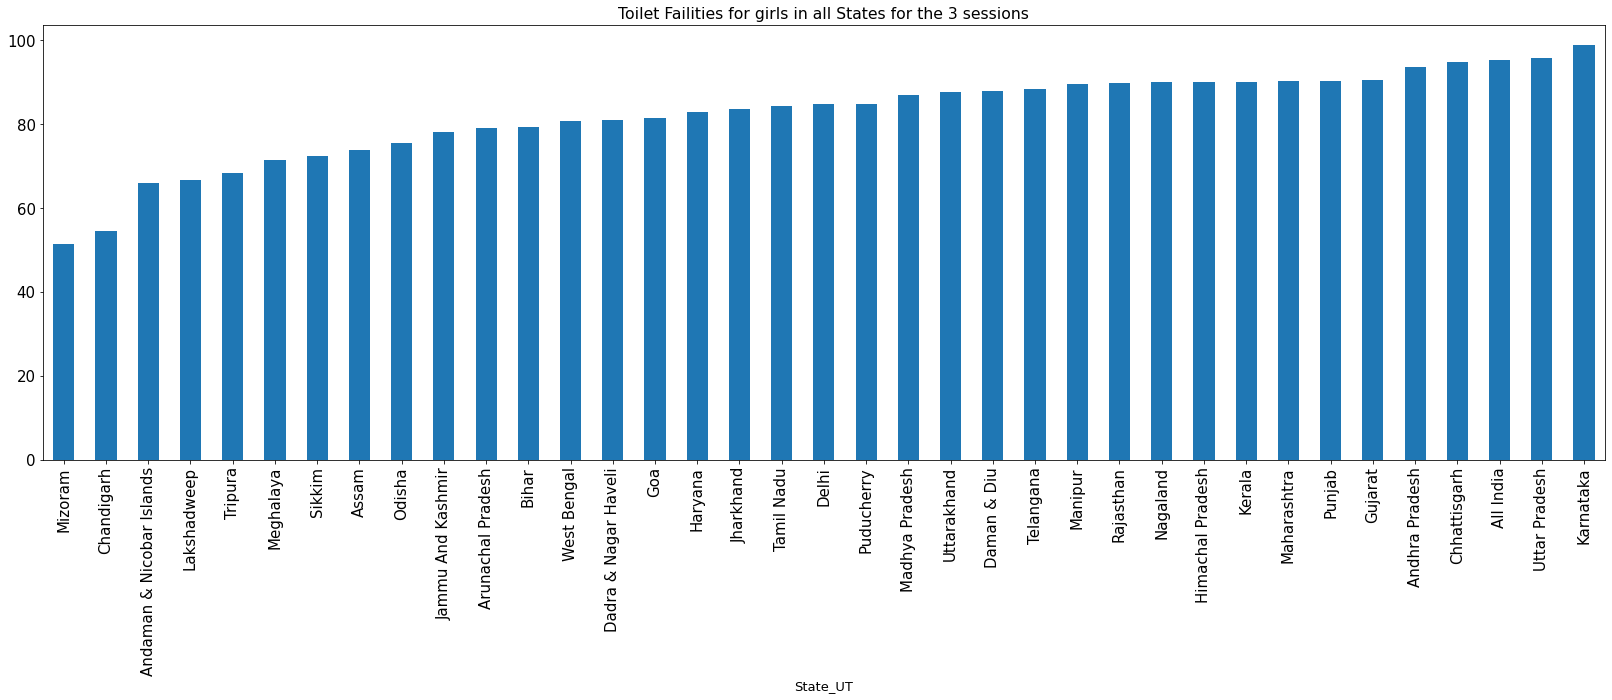

In [23]:
girls_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all States for the 3 sessions')

## We can see clearly that 'Mizoram' state has the poorest toilet facilities and 'Kamataka' has the best toilet facilities for girls.

## Toilet Facillities based on States location of Schools (2013-14)

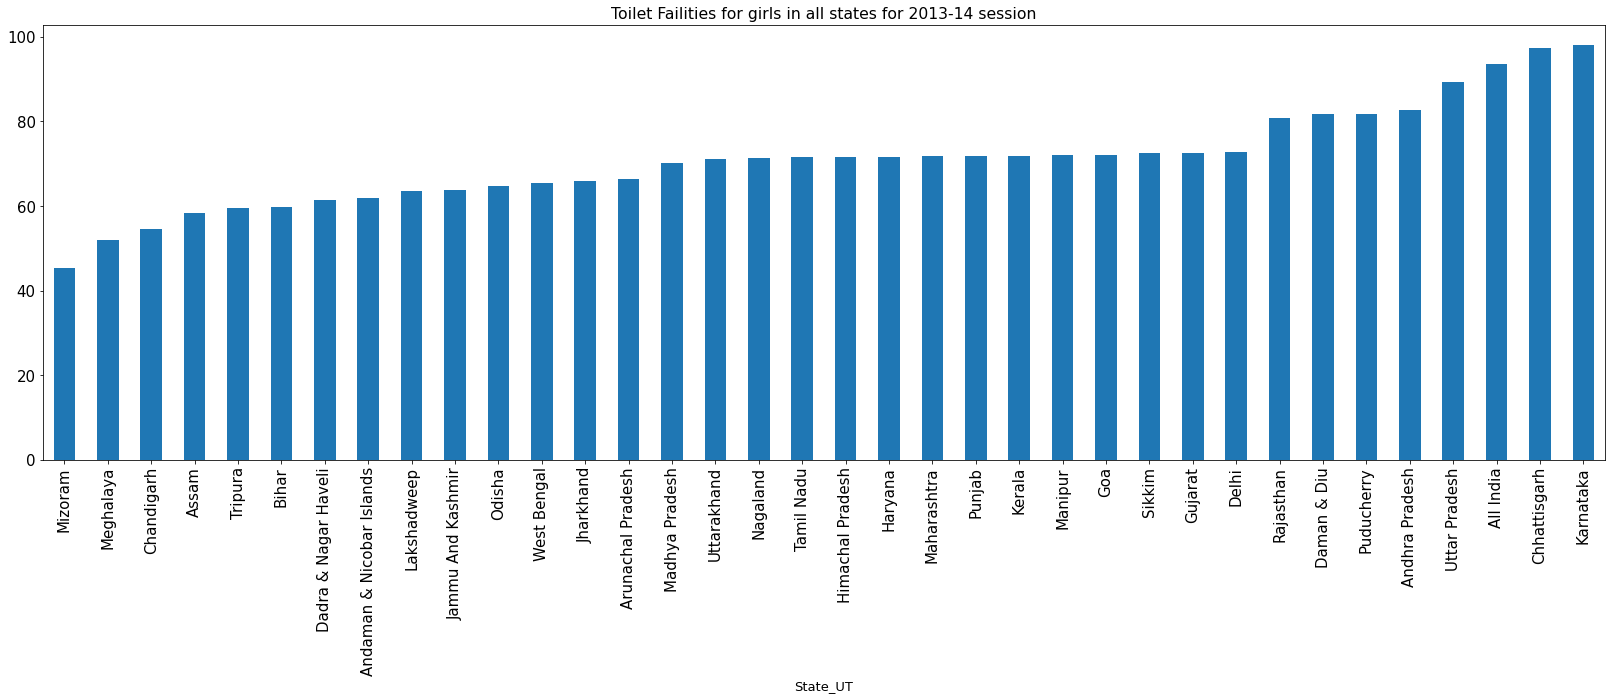

In [24]:
girls_2013.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all states for 2013-14 session')

### In the 2013-14 session 'Mizoram' state had the poorest toilet facility while 'Kamataka' had the best toilet facility for girls.

## Toilet Facillities based on States location of Schools (2014-15)

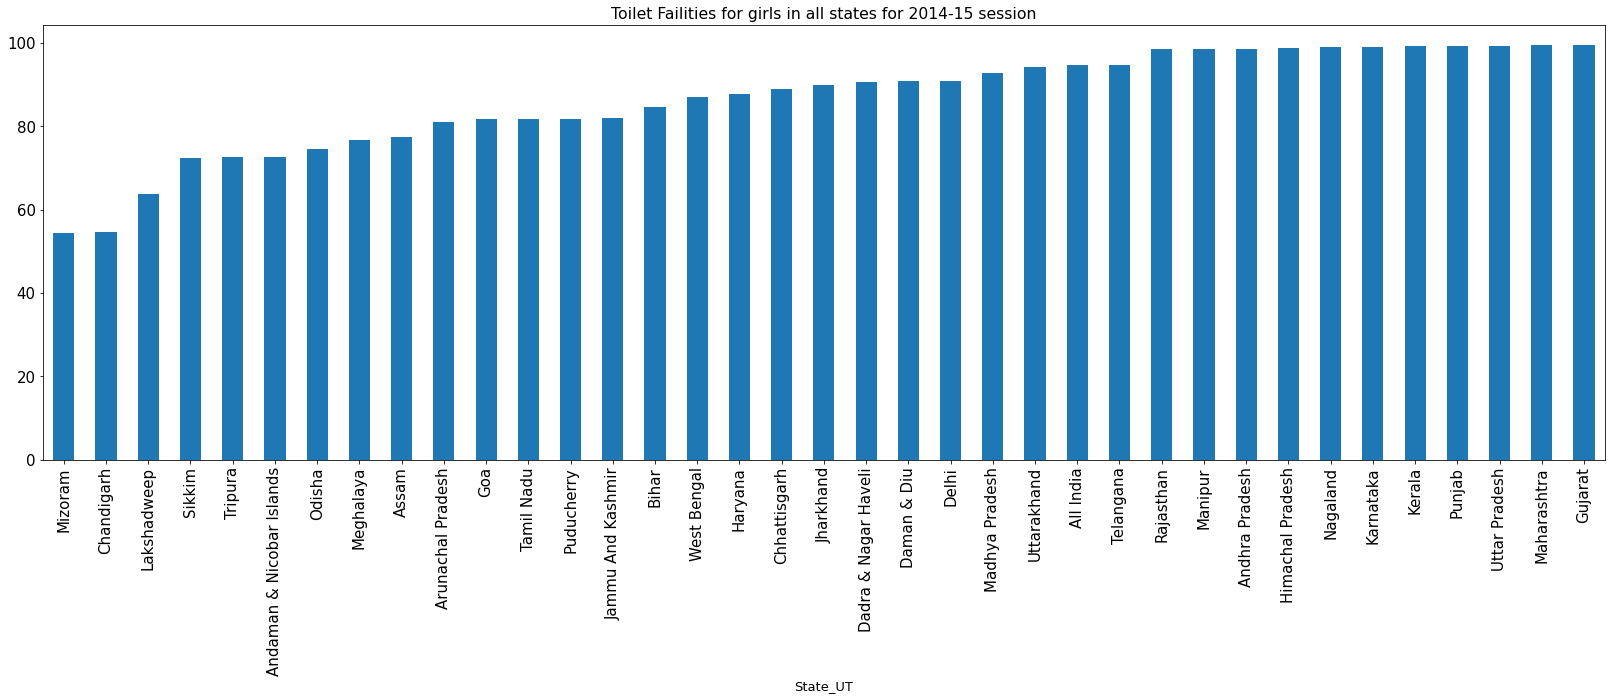

In [25]:
girls_2014.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all states for 2014-15 session')

### In the 2014-15 session 'Mizoram' state had the poorest toilet facility while 'Gujarat' had the best toilet facility for girls.

## Toilet Facillities based on States location of Schools (2015-16)

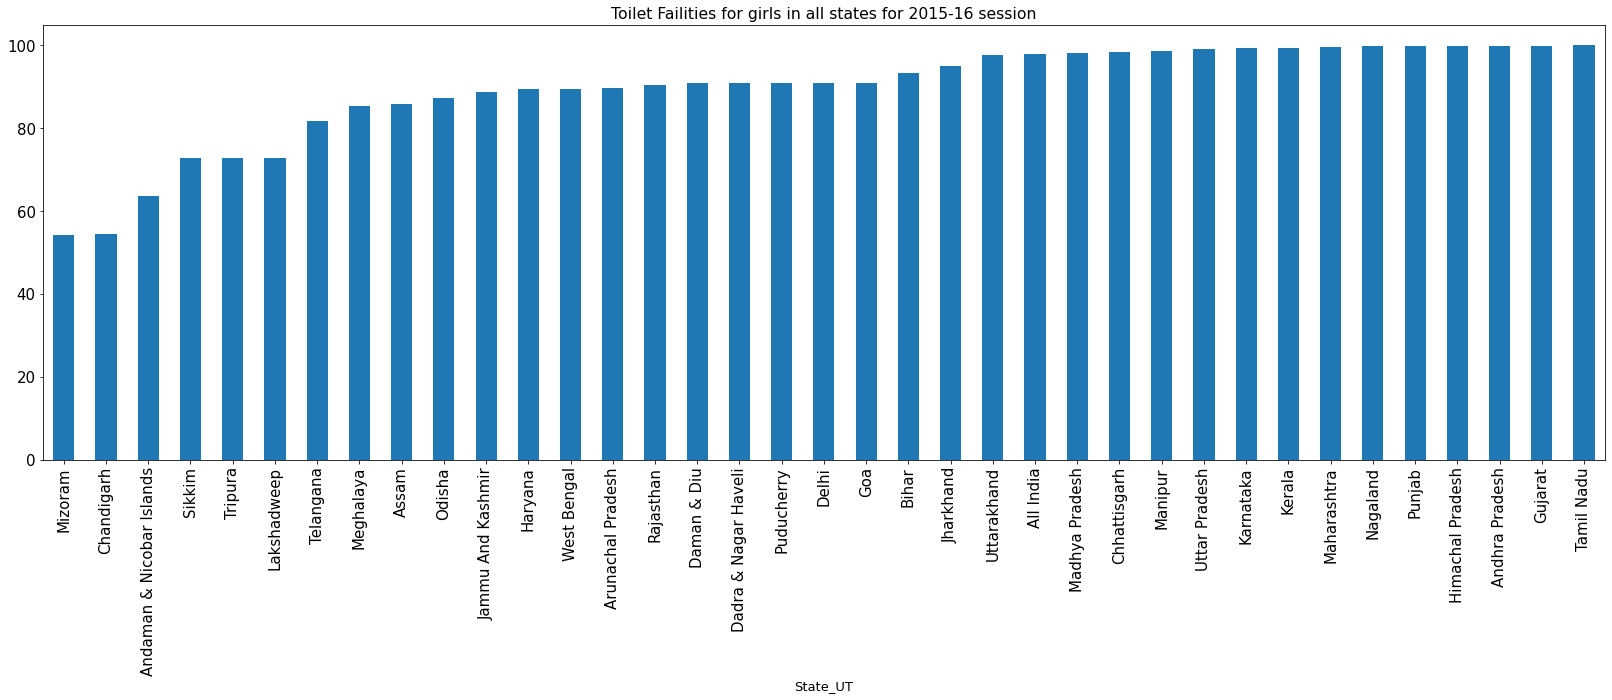

In [26]:
girls_2015.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all states for 2015-16 session')

### In the 2015-16 session'Mizoram' state still had the poorest toilet facility while 'Tamil Nadu' had the best toilet facility for girls

## Exploration of the state with the Overall Poorest Toilet Facilities 'Mizoram'

# Boys

In [27]:
boys_worst = boys.iloc[np.where(boys.State_UT=='Mizoram')]

In [28]:
boys_worst.head()
boys_worst.shape

(3, 13)

## Toilet Facilities in 2013-14 Session in Mizoram

In [29]:
cols_to_drop13 = [ col for col in categ if (boys_worst.iloc[np.where(boys_worst.year == '2013-14')][col] > 0).to_list()[0] != True]
new_boys_worst13 = boys_worst.iloc[np.where(boys_worst.year == '2013-14')].drop(columns=['year']).drop(columns = cols_to_drop13)

print(len(cols_to_drop13))

6


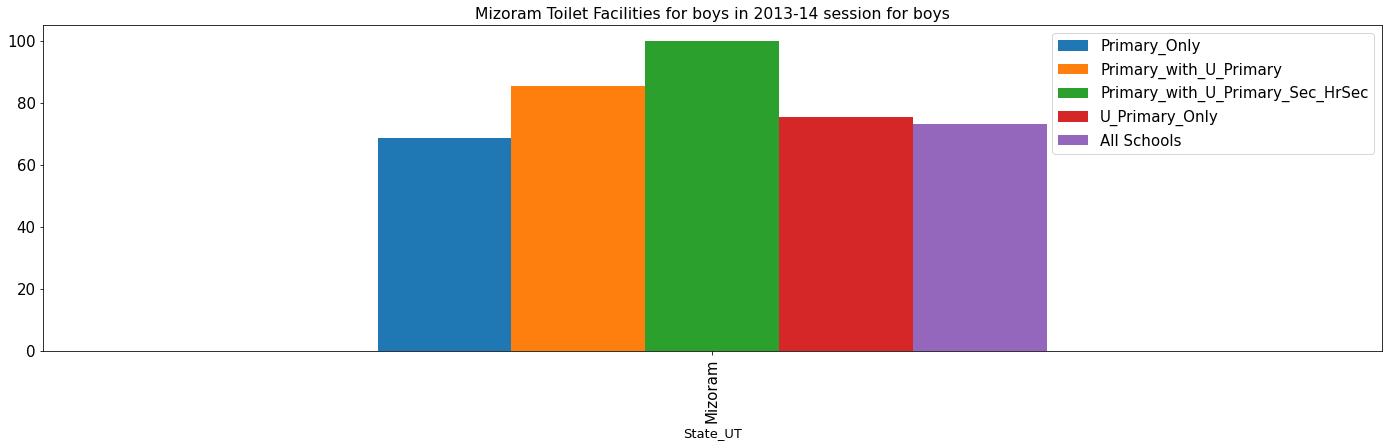

In [30]:
new_boys_worst13.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for boys in 2013-14 session for boys')

## In 2013-14 session Primary_Only school category had the least toilet facility among the category types that had toilet facilities. 
### 6 other school categories had 0 toilet facilities this same year for boys

## Toilet Facilities in 2014-15 Session in Mizoram

5


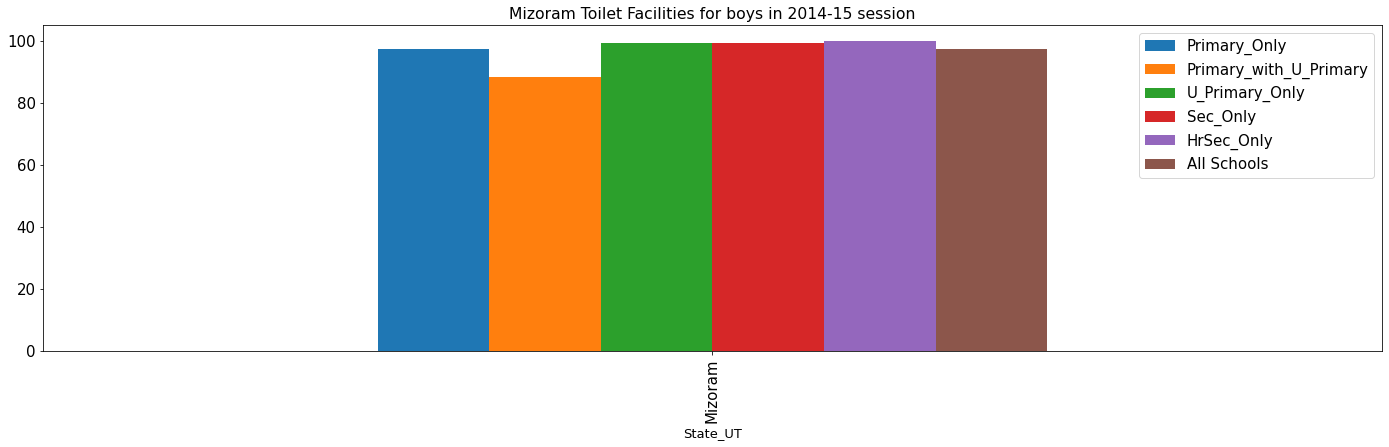

In [31]:
cols_to_drop14 = [ col for col in categ if (boys_worst.iloc[np.where(boys_worst.year == '2014-15')][col] > 0).to_list()[0] != True]

new_boys_worst14 = boys_worst.iloc[np.where(boys_worst.year == '2014-15')].drop(columns=['year']).drop(columns = cols_to_drop14)

new_boys_worst14.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for boys in 2014-15 session')

print(len(cols_to_drop14))

## In 2014-15 session 'Primary_with_U_Primary' school category had the least toilet facility among the category types that had toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year

## Toilet Facilities in 2015-16 Session in Mizoram

5


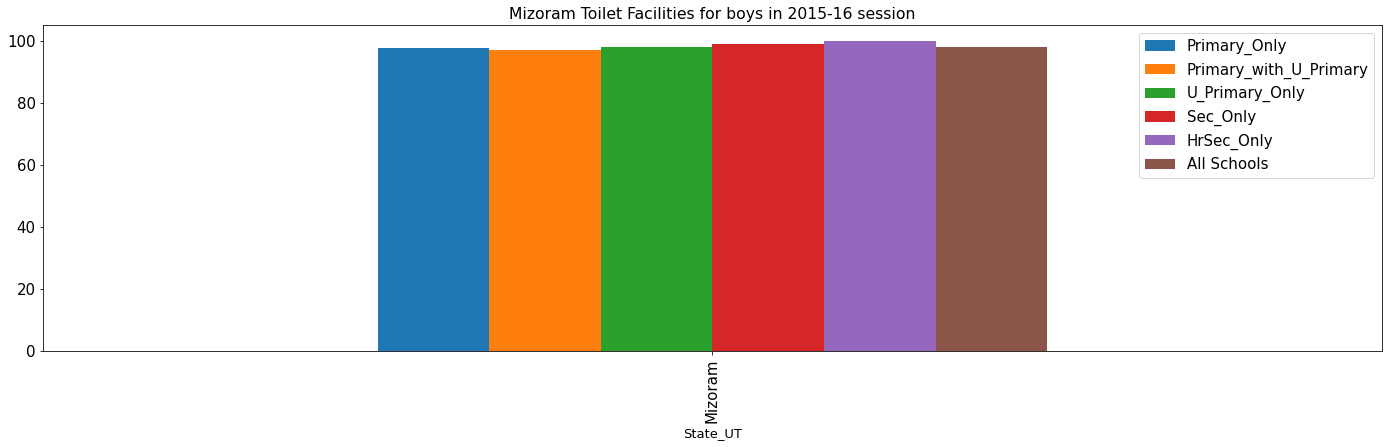

In [32]:
cols_to_drop15 = [ col for col in categ if (boys_worst.iloc[np.where(boys_worst.year == '2015-16')][col] > 0).to_list()[0] != True]

new_boys_worst15 = boys_worst.iloc[np.where(boys_worst.year == '2015-16')].drop(columns=['year']).drop(columns = cols_to_drop15)

new_boys_worst15.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for boys in 2015-16 session')

print(len(cols_to_drop15))

## In 2015-16 session All displayed school category in the chart have decent toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year for boys.

# Girls

In [33]:
girls_worst = girls.iloc[np.where(girls.State_UT=='Mizoram')]

girls_worst.head()
girls_worst.shape

(3, 13)

## Toilet Facilities in 2013-14 Session in Mizoram

In [34]:
COLS_to_drop13 = [ col for col in categ if (girls_worst.iloc[np.where(girls_worst.year == '2013-14')][col] > 0).to_list()[0] != True]
new_girls_worst13 = girls_worst.iloc[np.where(girls_worst.year == '2013-14')].drop(columns=['year']).drop(columns = COLS_to_drop13)

print(len(COLS_to_drop13))

6


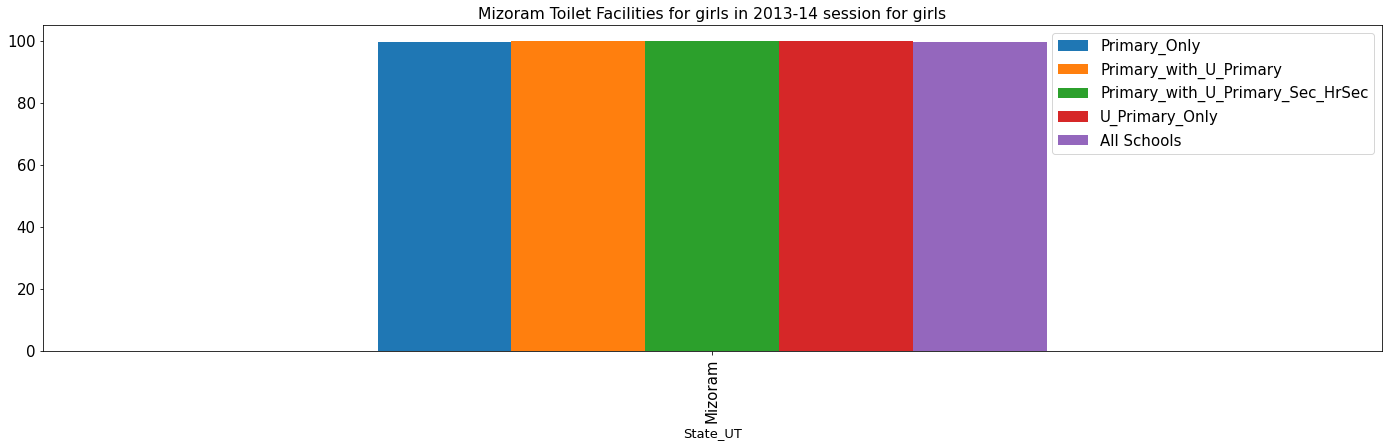

In [35]:
new_girls_worst13.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for girls in 2013-14 session for girls')

## All the student categories that had toilet facilities had enough.
### In this same year other 6 student categories had 0 toilet facilities.
### The primary category for boys in this same year suffered to about 60, but it's a decent 99.xx for girls...

## Toilet Facilities in 2014-15 Session in Mizoram

5


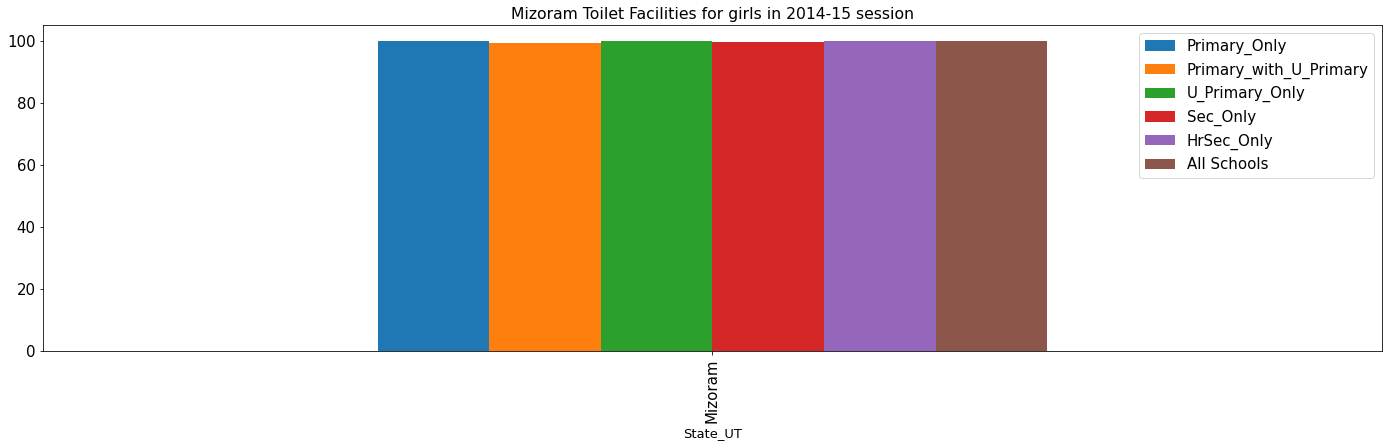

In [36]:
COLS_to_drop14 = [ col for col in categ if (girls_worst.iloc[np.where(girls_worst.year == '2014-15')][col] > 0).to_list()[0] != True]

new_girls_worst14 = girls_worst.iloc[np.where(girls_worst.year == '2014-15')].drop(columns=['year']).drop(columns = COLS_to_drop14)

new_girls_worst14.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for girls in 2014-15 session')

print(len(COLS_to_drop14))

## In 2014-15 session 'Primary_with_U_Primary' school category had the least toilet facility among the category types that had toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year

## Toilet Facilities in 2015-16 Session in Mizoram

5


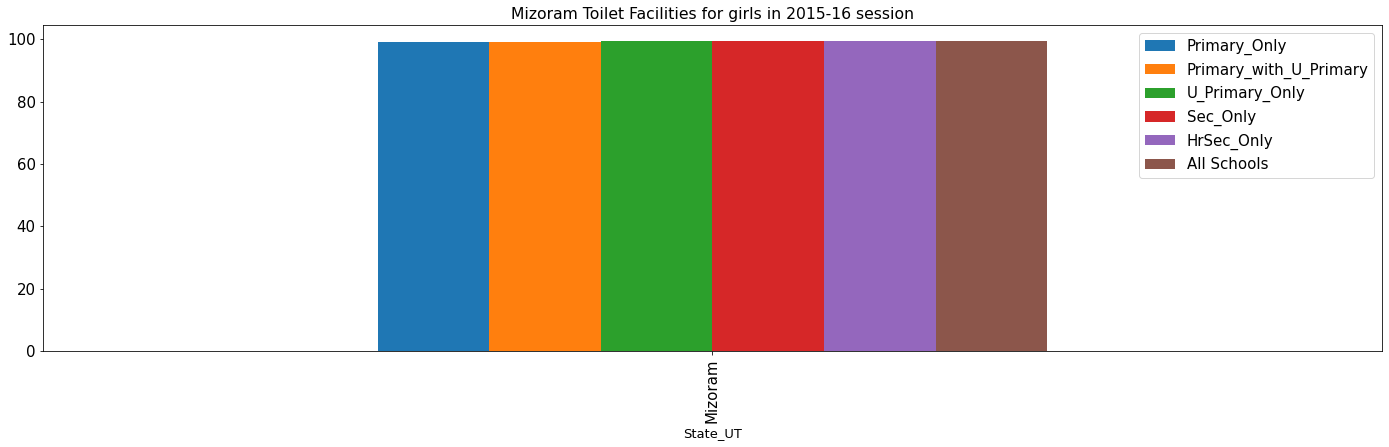

In [37]:
COLS_to_drop15 = [ col for col in categ if (girls_worst.iloc[np.where(girls_worst.year == '2015-16')][col] > 0).to_list()[0] != True]

new_girls_worst15 = girls_worst.iloc[np.where(girls_worst.year == '2015-16')].drop(columns=['year']).drop(columns = COLS_to_drop15)

new_girls_worst15.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for girls in 2015-16 session')

print(len(COLS_to_drop15))

## In 2015-16 session All displayed school category in the chart have decent toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year for girls.

### Brief exoloration of student categories that had 0 toilet facilities in Mizoram

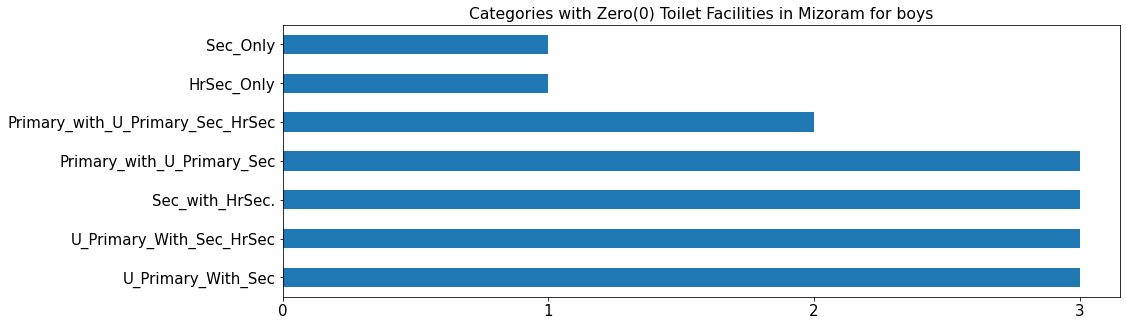

In [38]:
pd.concat([pd.Series(cols_to_drop13), pd.Series(cols_to_drop14), pd.Series(cols_to_drop15)]).value_counts().plot(kind='barh',xticks=[0,1,2,3],figsize=(15, 5),title='Categories with Zero(0) Toilet Facilities in Mizoram for boys')

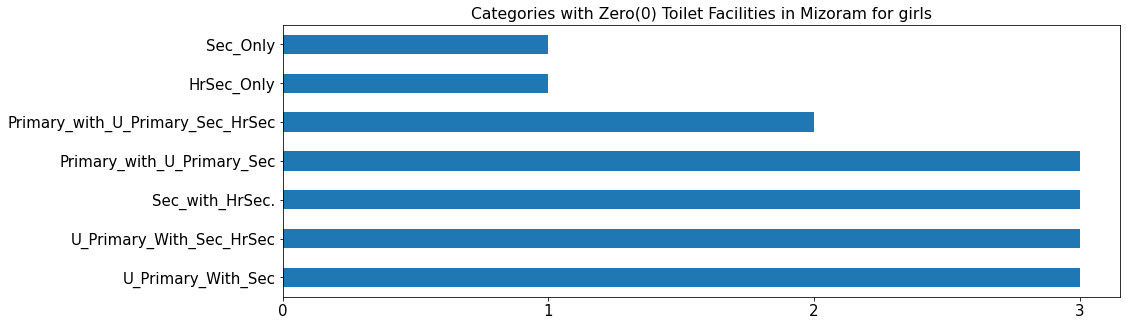

In [39]:
pd.concat([pd.Series(COLS_to_drop13), pd.Series(COLS_to_drop14), pd.Series(COLS_to_drop15)]).value_counts().plot(kind='barh',xticks=[0,1,2,3],figsize=(15, 5),title='Categories with Zero(0) Toilet Facilities in Mizoram for girls')

### <q>U_Primary_With_Sec<q>' is the student category with the most recurring Zeroes(0) of Toilet Facilities for both boys and girls in Mizoram State